## Imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from functools import reduce
from tqdm import tqdm
from itertools import cycle
from random import choice, choices

from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import feature_selection

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option("display.max_columns", None)

plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:

    - Which variables are significant in predicting the price of a house, and

    - How well those variables describe the price of a house.
    
Also, determine the optimal value of lambda for ridge and lasso regression.

 
**Business Goal**

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Data Loading

In [5]:
df = pd.read_csv("input/train.csv")
df.shape

(1460, 81)

In [6]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
df.duplicated().sum()

0

- No duplicated values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [11]:
df.isna().sum().sort_values(ascending=False).head(20)/df.shape[0]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

- some columns having null values

In [12]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## EDA

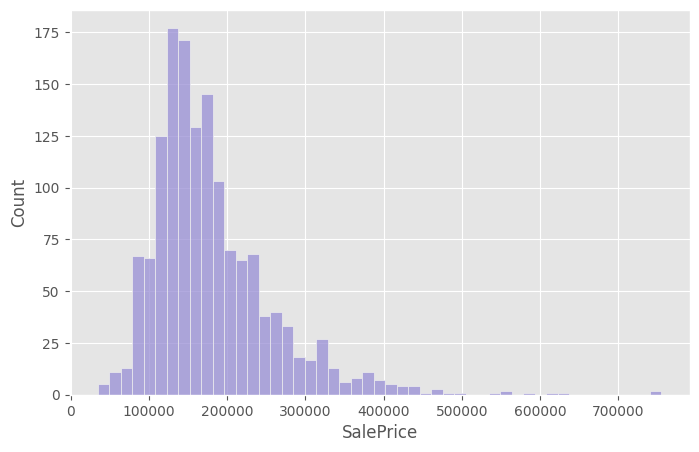

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], color = choice(color_pal))
plt.show()

- target distribution looking like right skewed

In [14]:
def plot_cat_feature_distributions(data, feature_names, target):
    import math
    num_features = len(feature_names)
    num_columns = 3
    num_rows = math.ceil(num_features / num_columns)
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 5*num_rows))
    
    for i, feature in enumerate(feature_names):
        row_idx = i // num_columns
        col_idx = i % num_columns
        ax = axes[row_idx, col_idx]
        
        # sns.countplot(data=data, x=feature, ax=ax)
        sns.boxplot(data=data, x=feature, y=target, ax=ax)
        
        ax.set_title(f'Distribution of {feature}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    
    # Remove empty subplots if there are fewer features than expected
    for i in range(num_features, num_rows * num_columns):
        fig.delaxes(axes.flatten()[i])
    
    plt.tight_layout()
    plt.show()

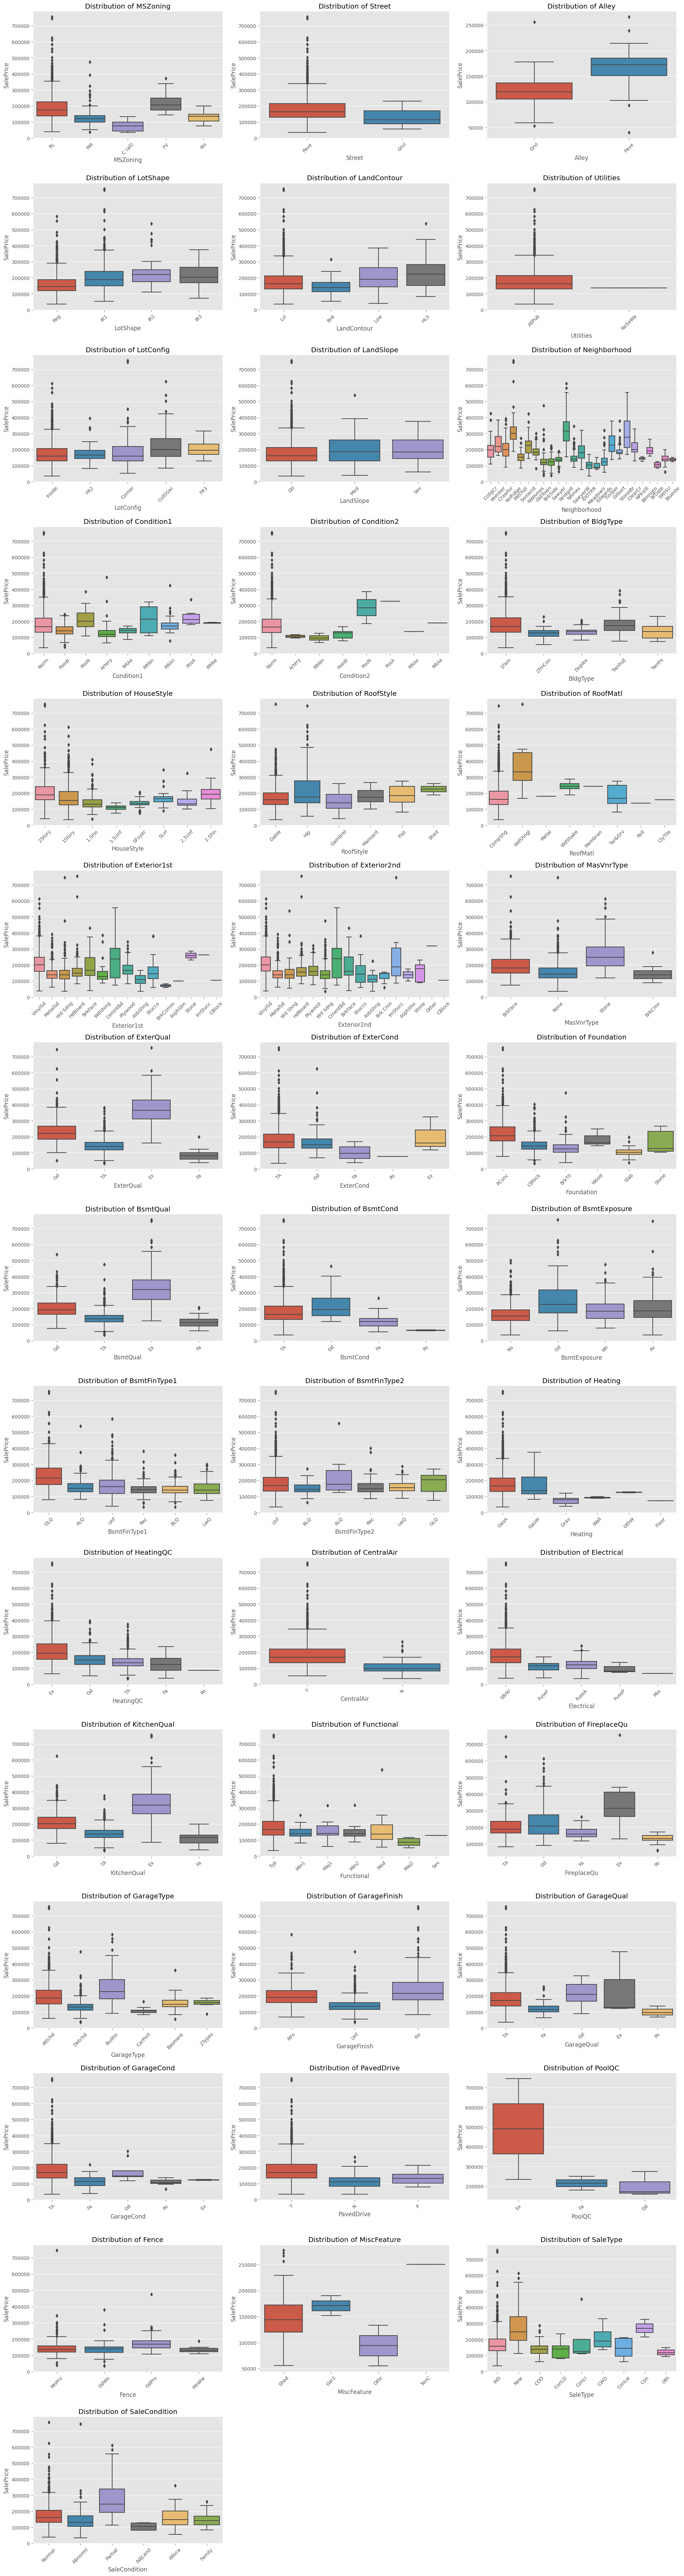

In [15]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

plot_cat_feature_distributions(data=df, feature_names=cat_cols, target='SalePrice')

- we can observe that for all categorical features we ploted target distbution box plots
- we can see lotshare increasing that salceprice also increasing
- similar kind of observations we can see

In [16]:
def plot_dist_box(data, target):
    
    color = choice(color_pal)
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))

    # Plot the distribution plot on the first subplot
    sns.histplot(data, ax=axes[0], color=color)
    axes[0].set_title('Distribution Plot')

    # Plot the box plot on the second subplot
    sns.boxplot(data, ax=axes[1], color=color)
    axes[1].set_title('Box Plot')
    
    # Plot the box plot on the second subplot
    sns.ecdfplot(data, ax=axes[2], color=color)
    axes[2].set_title('CDF Plot')
    
    # Plot the box plot on the second subplot
    sns.scatterplot(x=data, y=target, ax=axes[3], color=color)
    axes[3].set_title('Scatter Plot')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

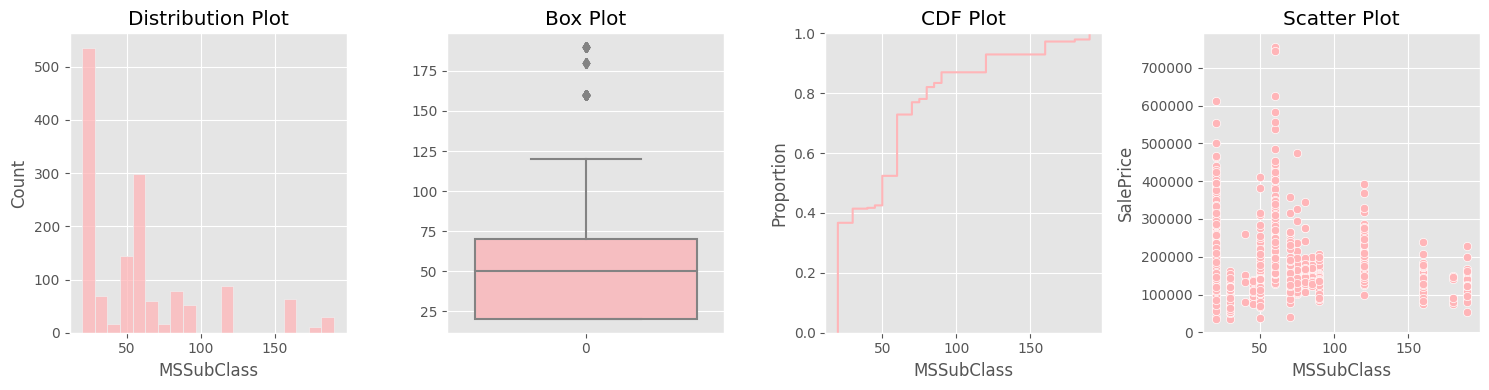

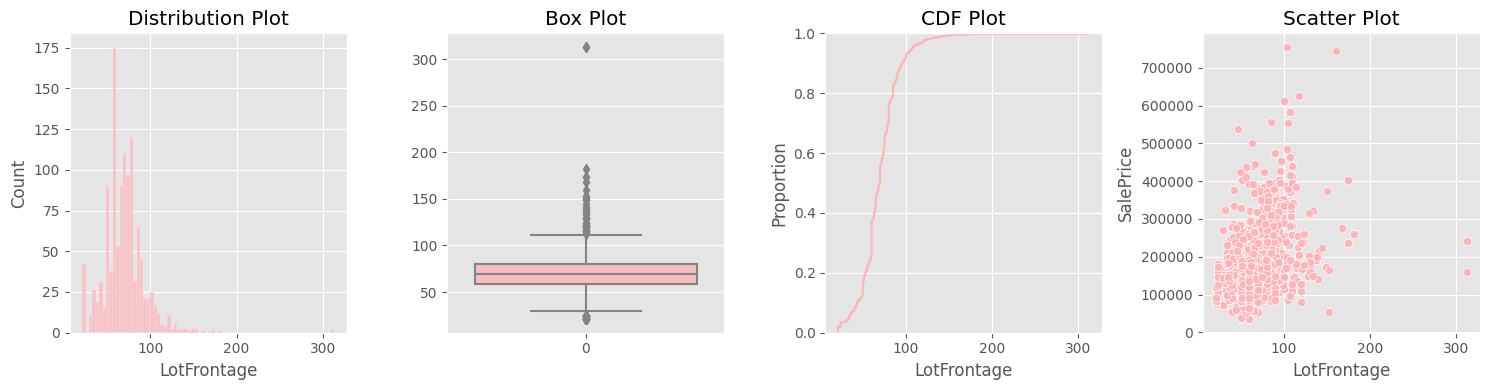

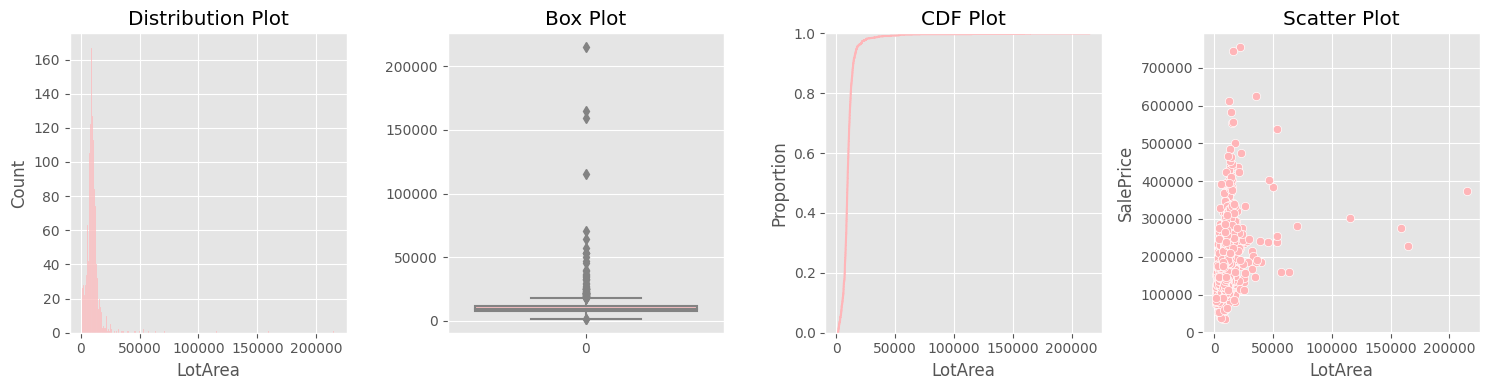

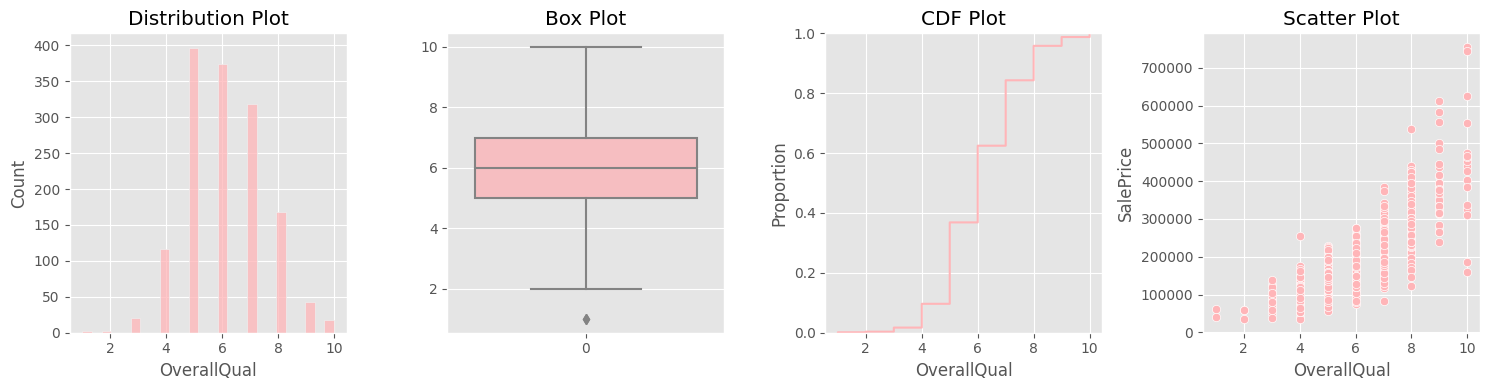

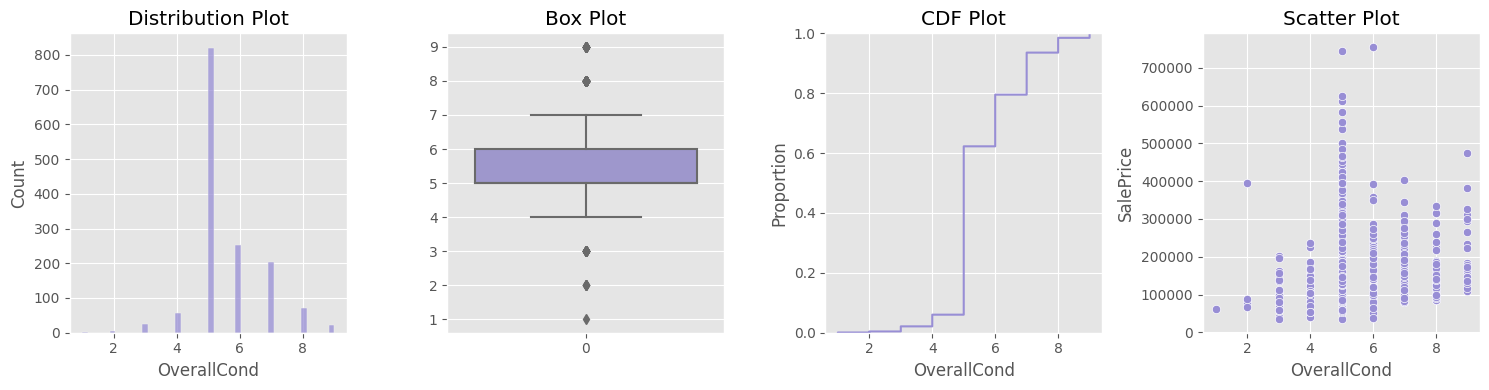

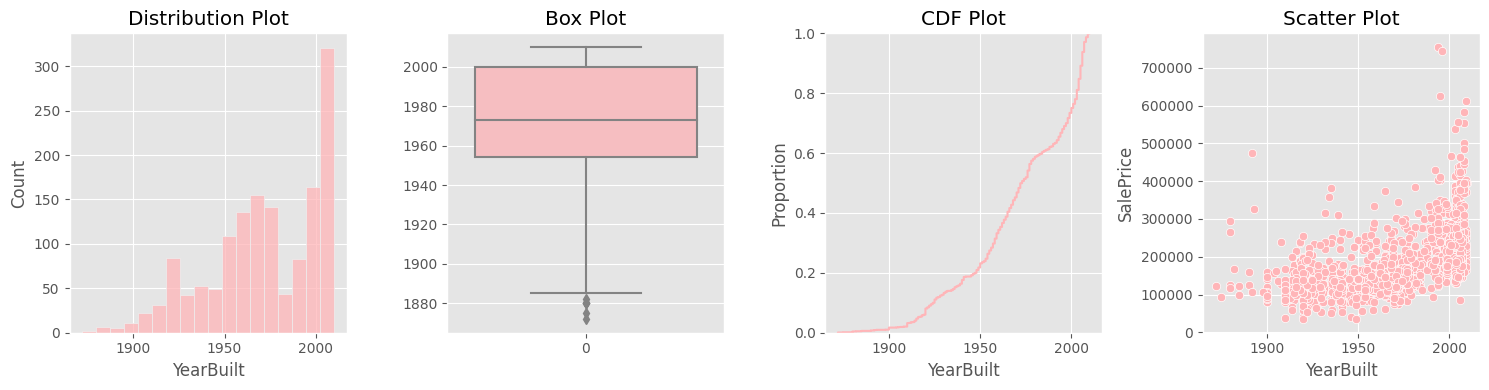

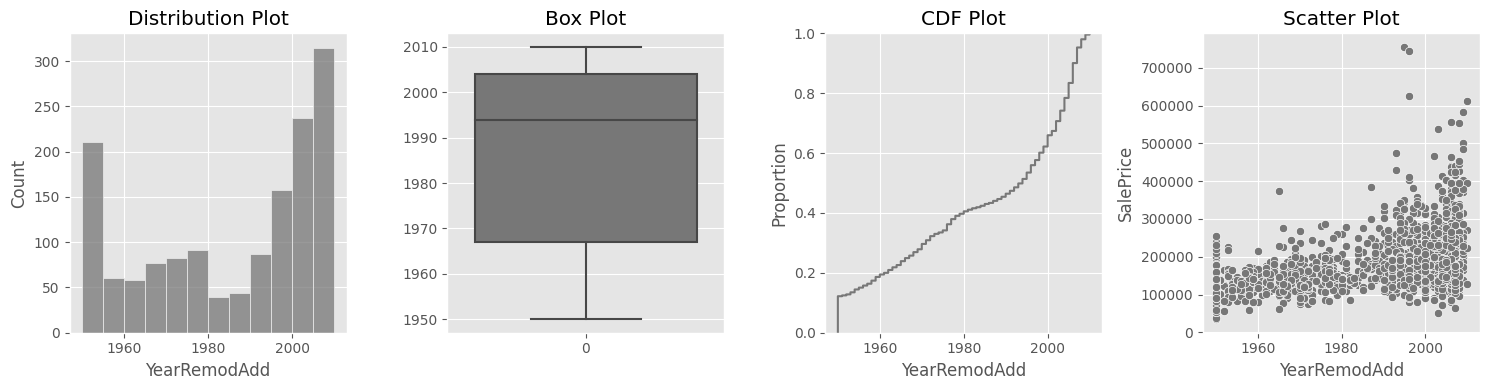

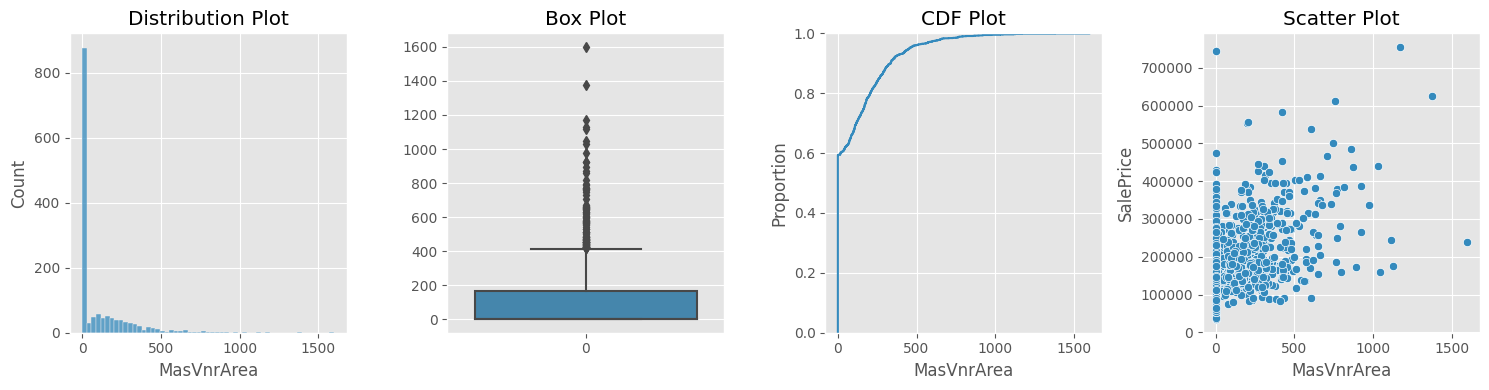

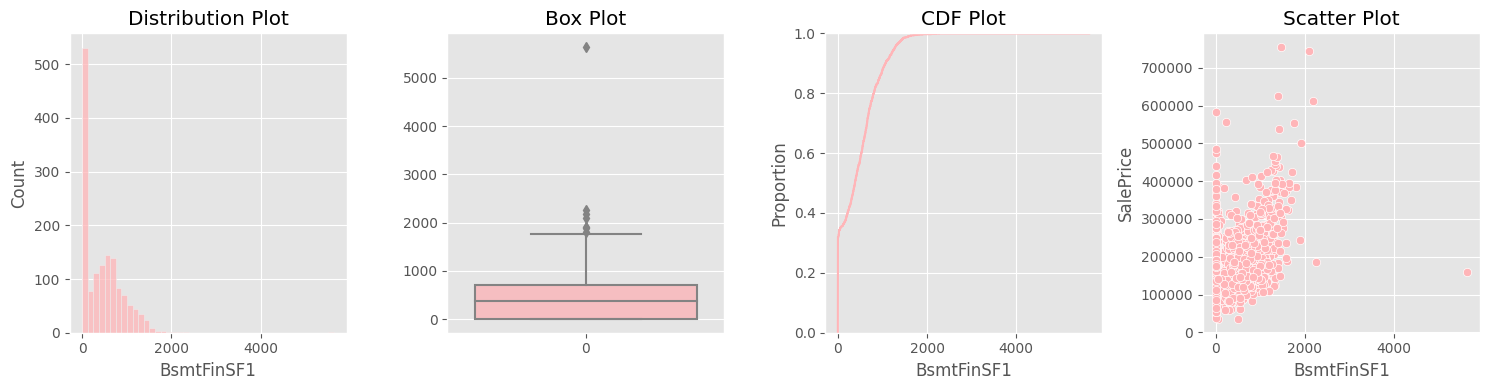

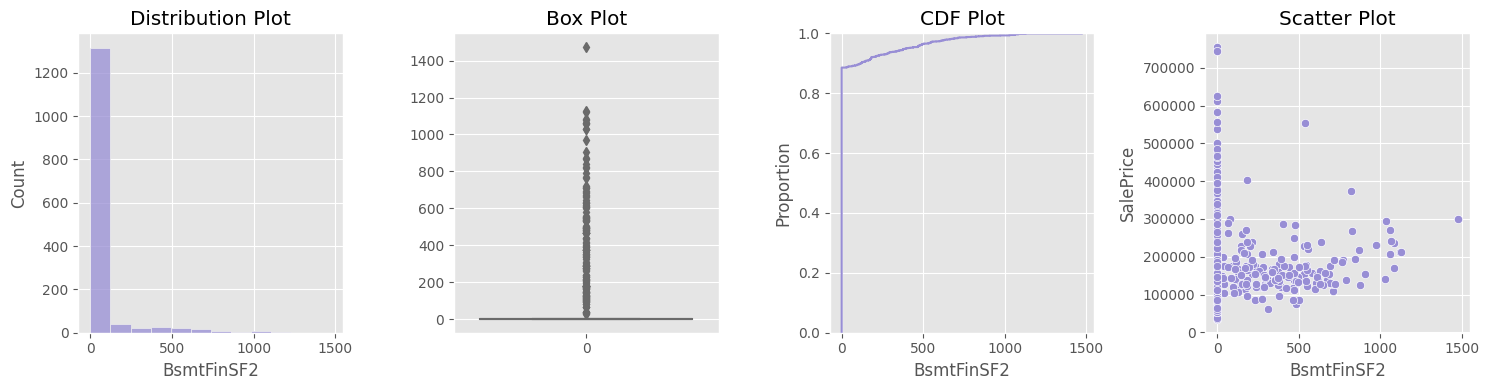

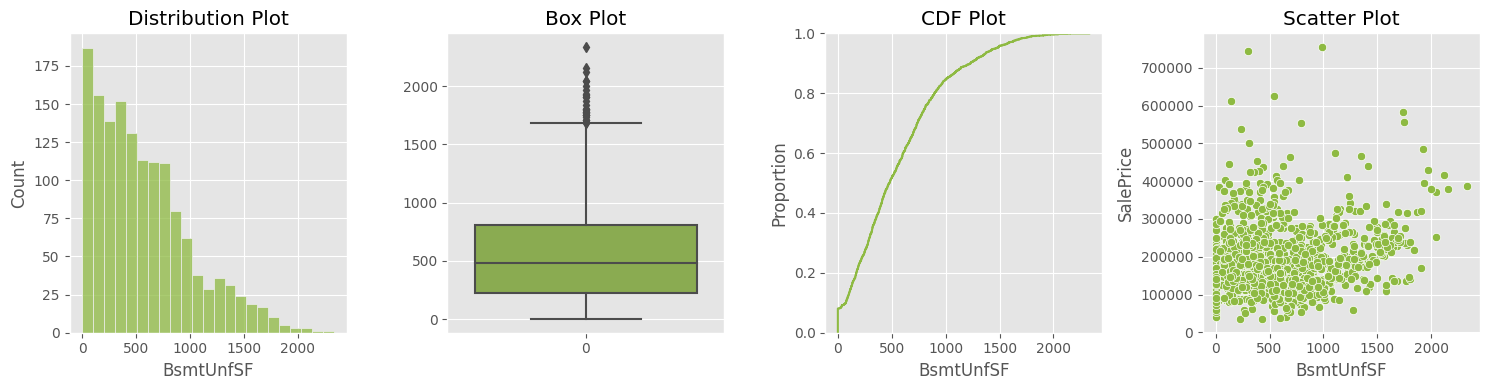

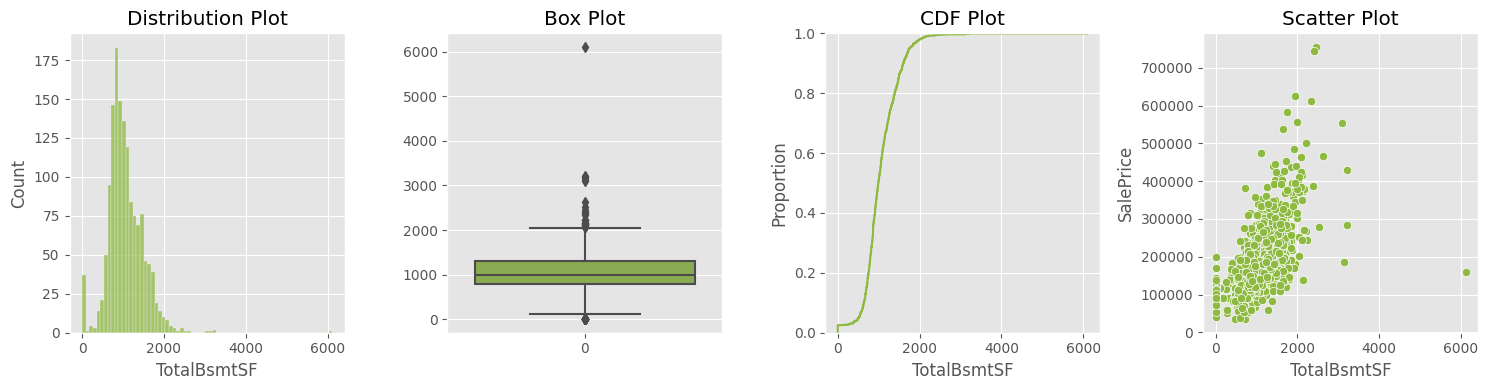

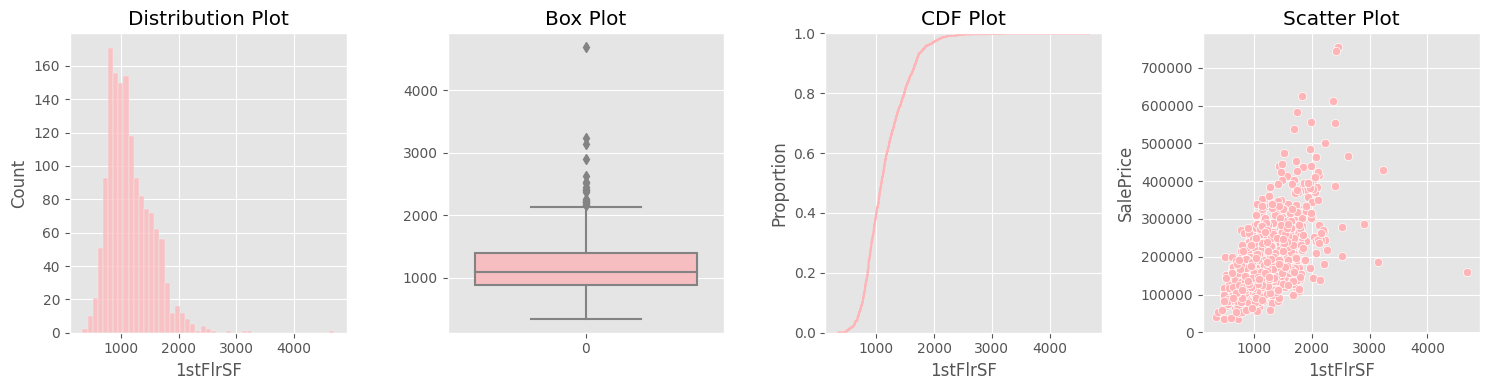

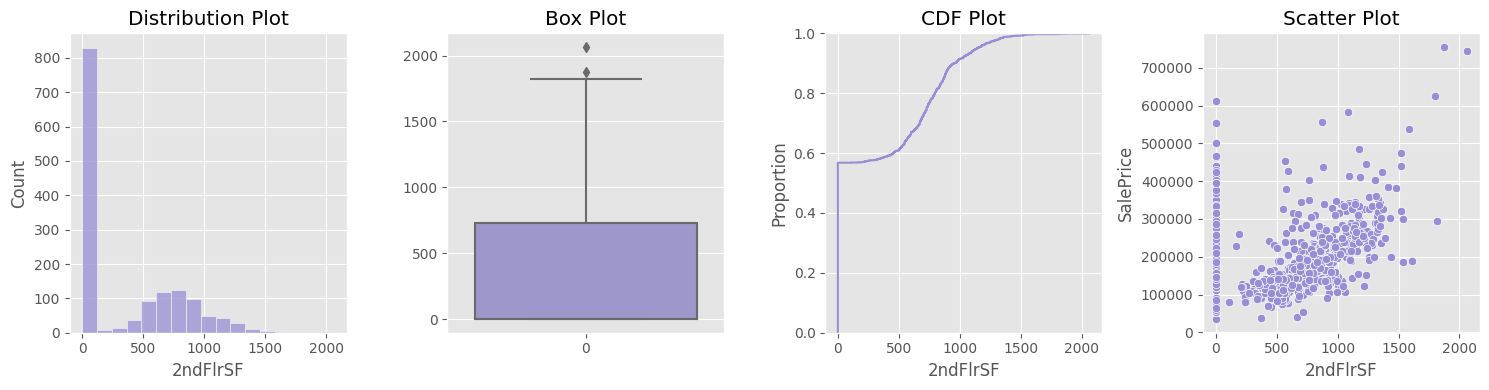

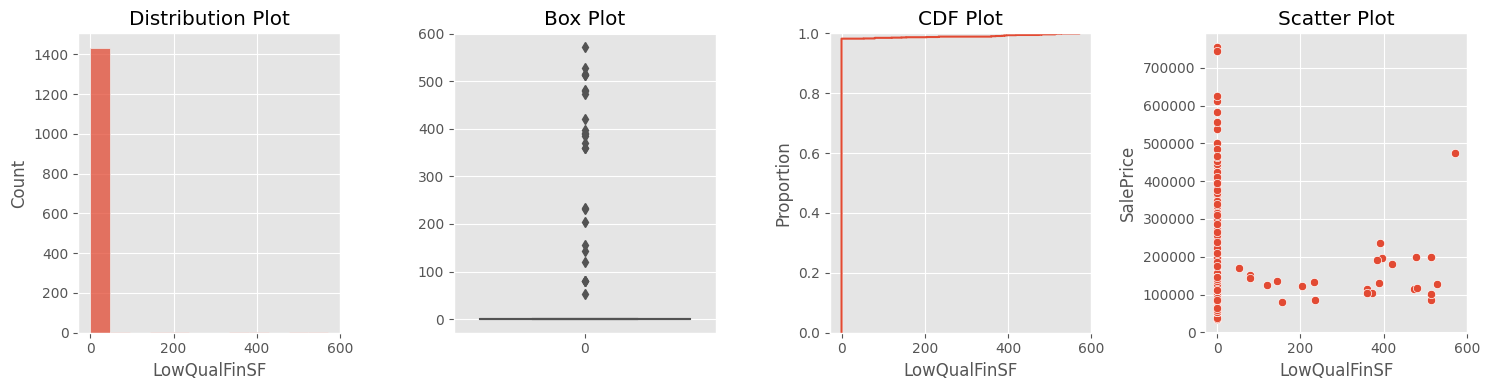

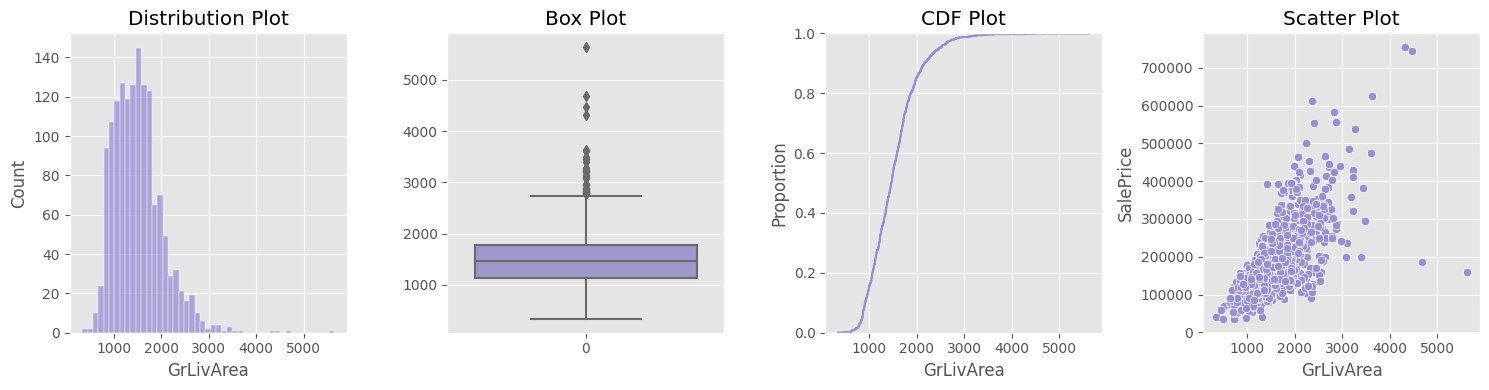

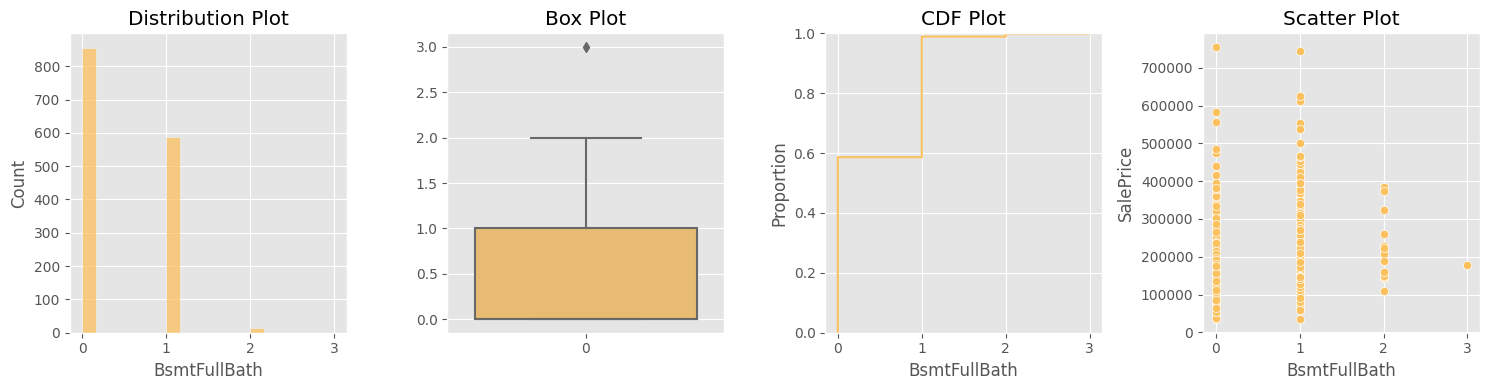

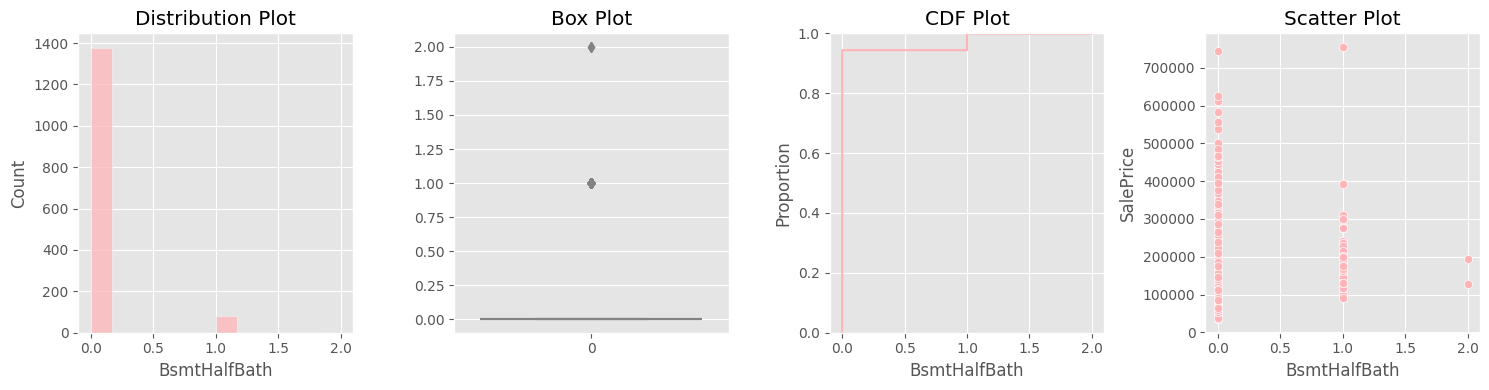

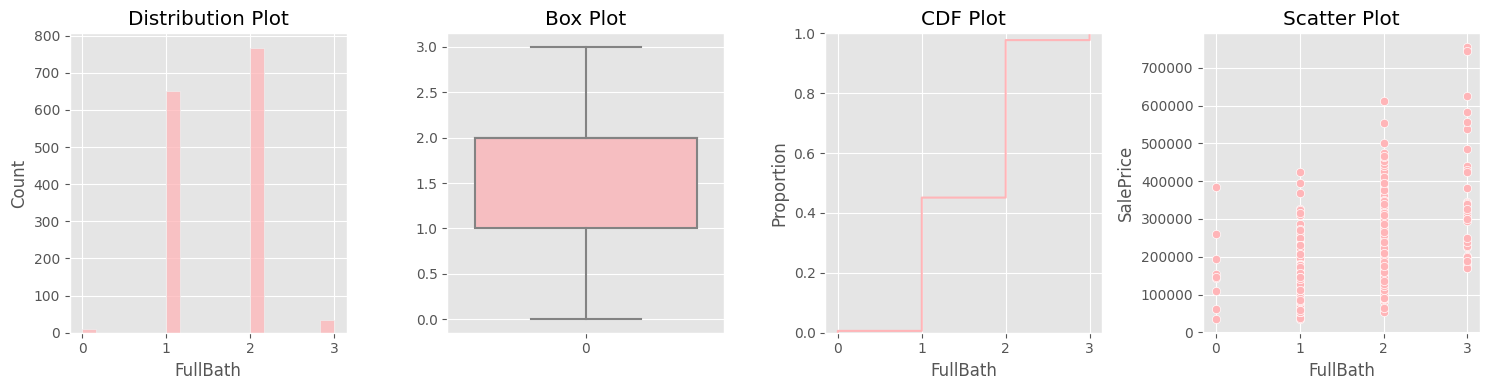

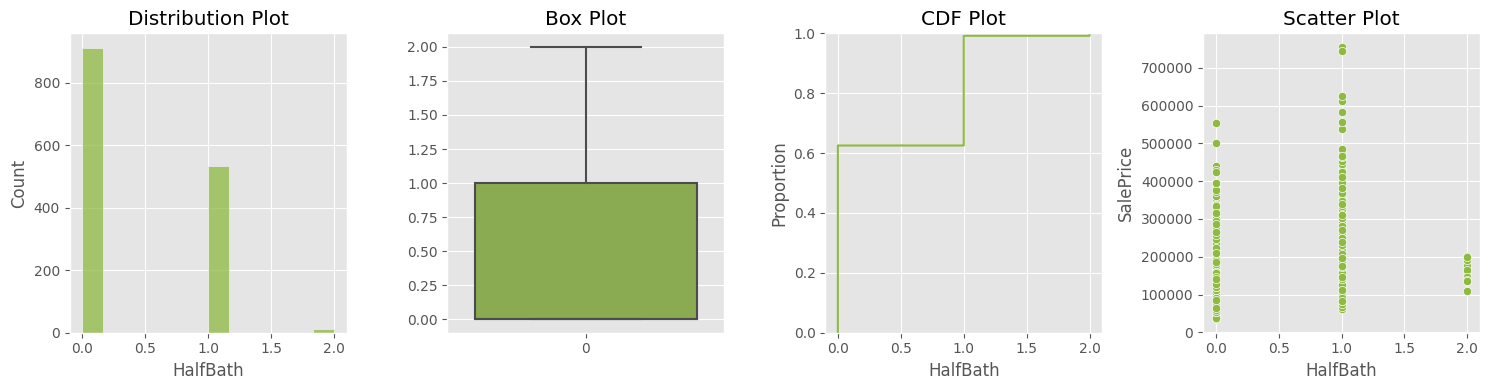

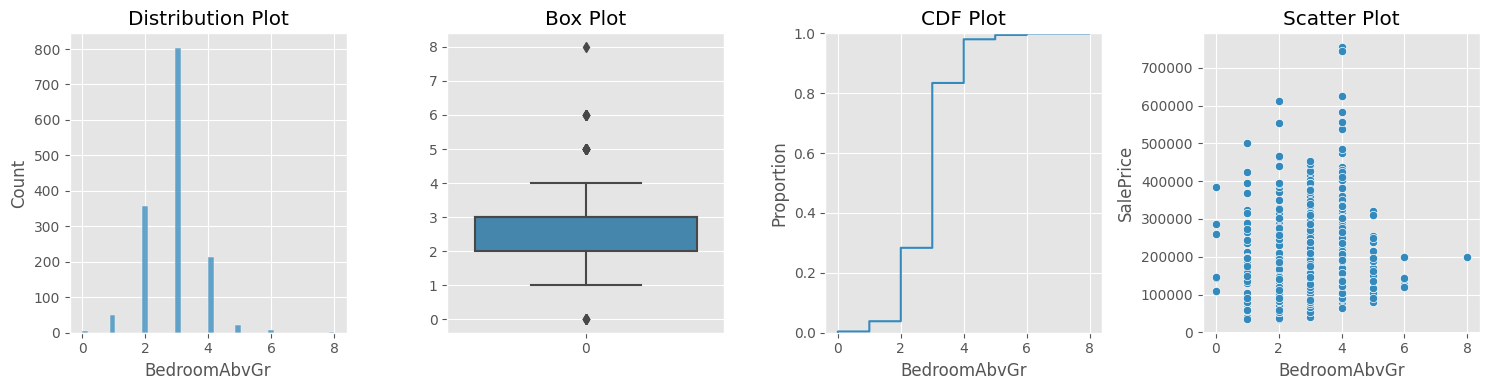

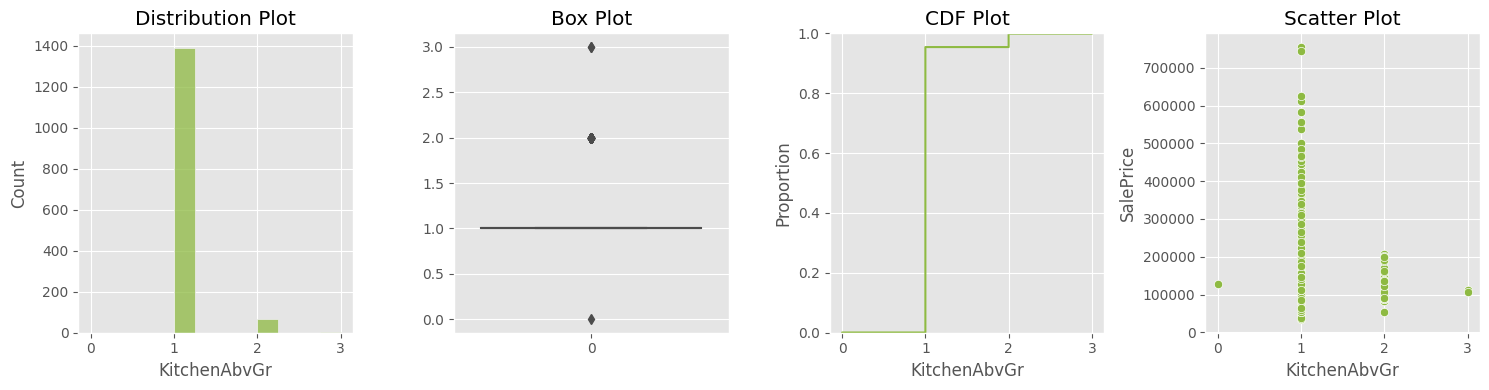

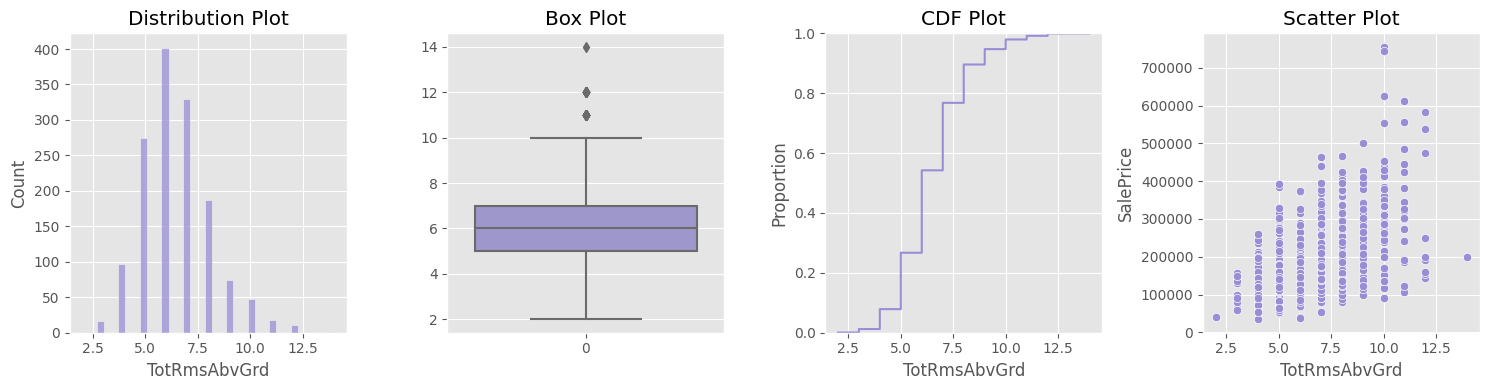

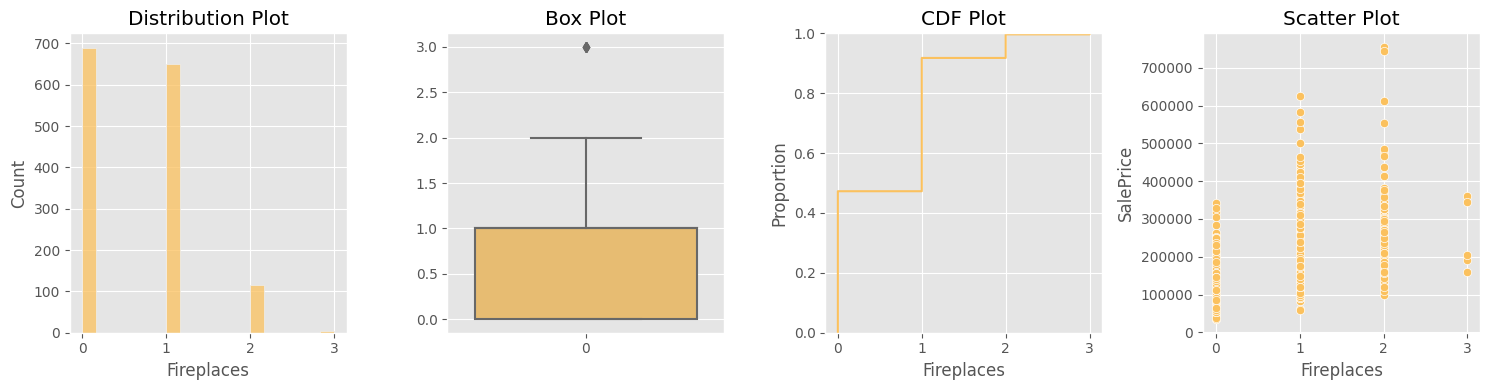

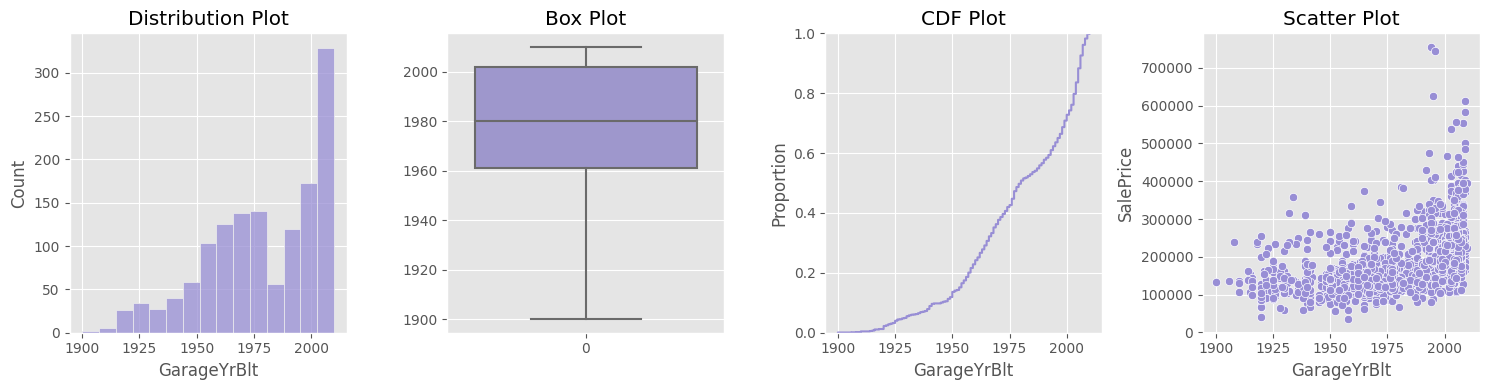

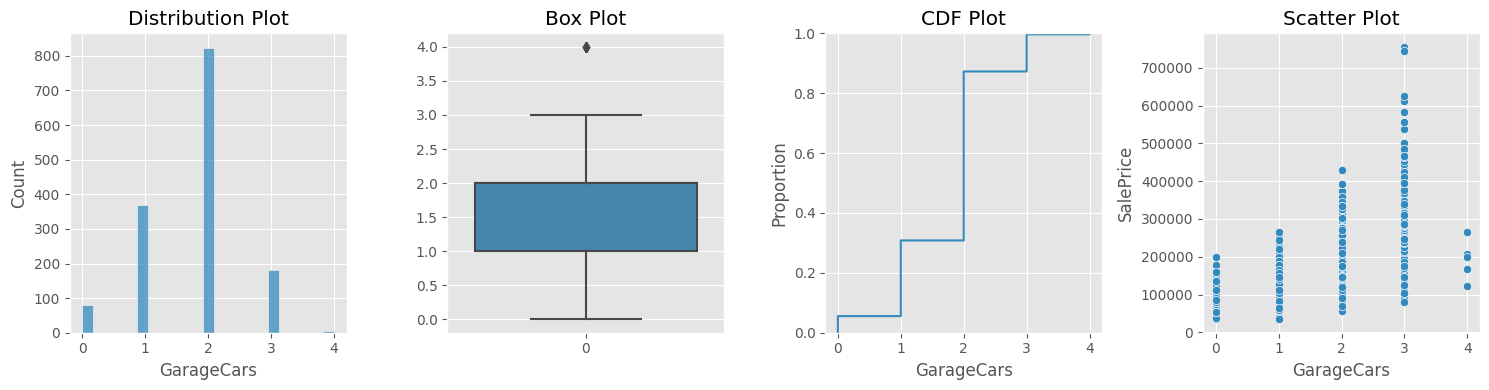

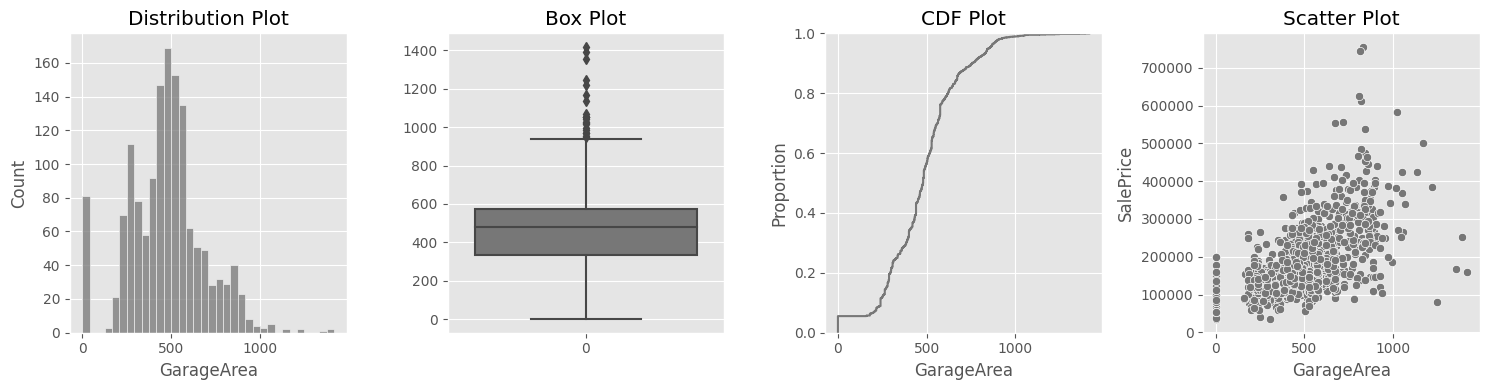

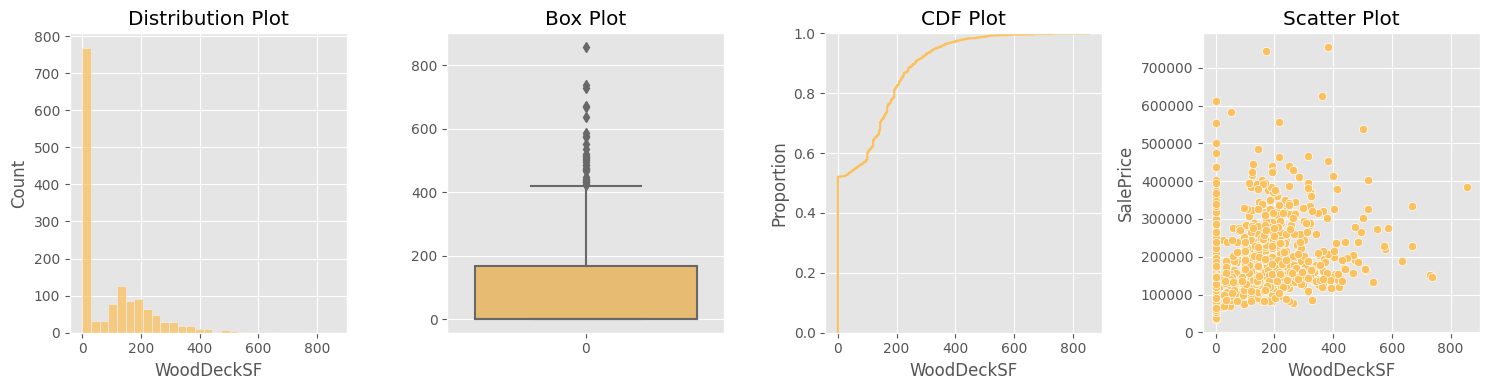

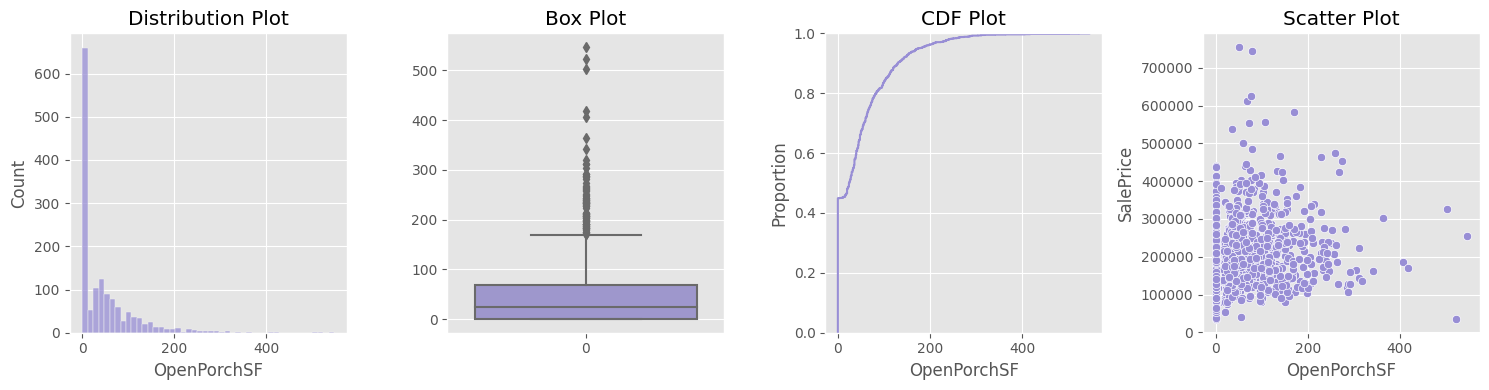

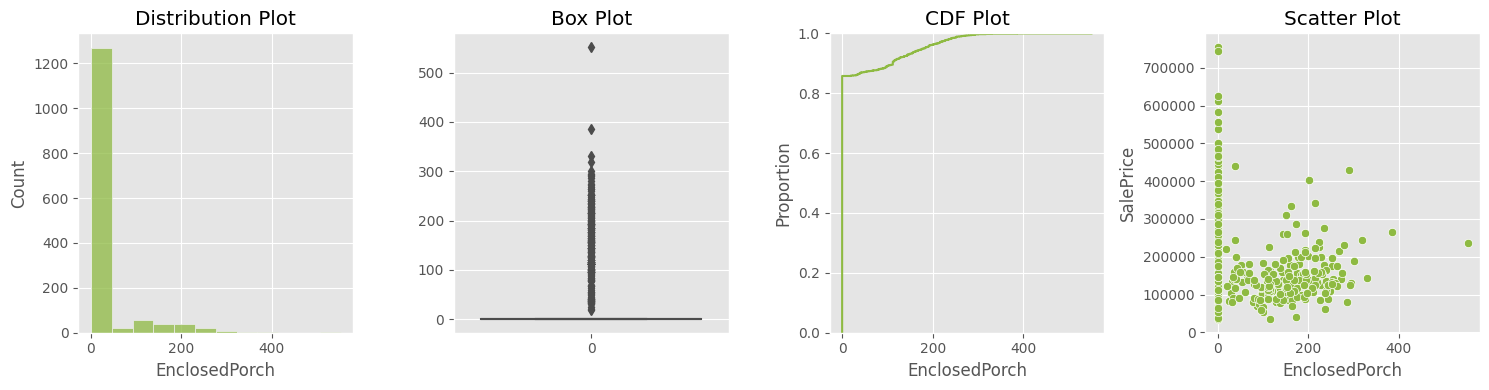

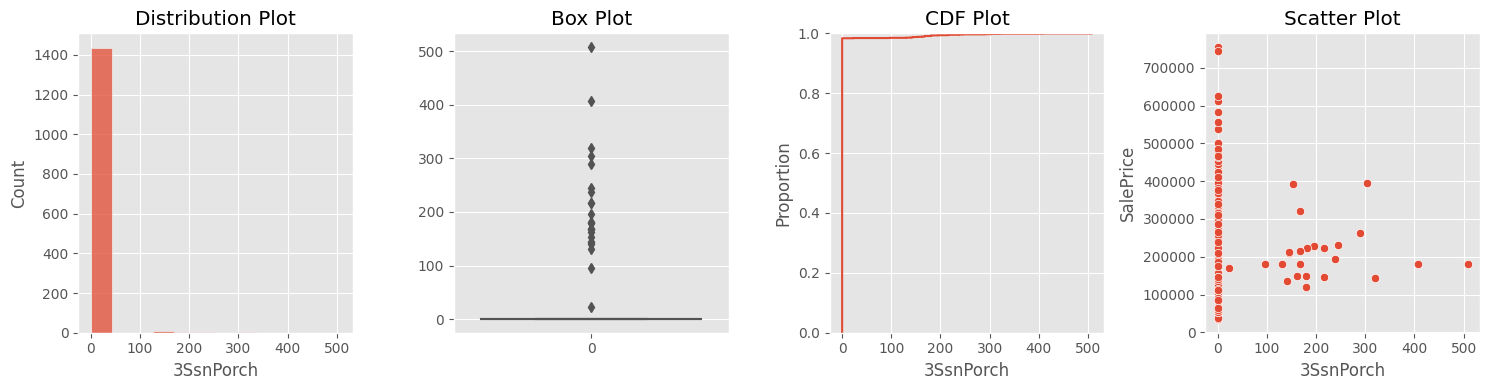

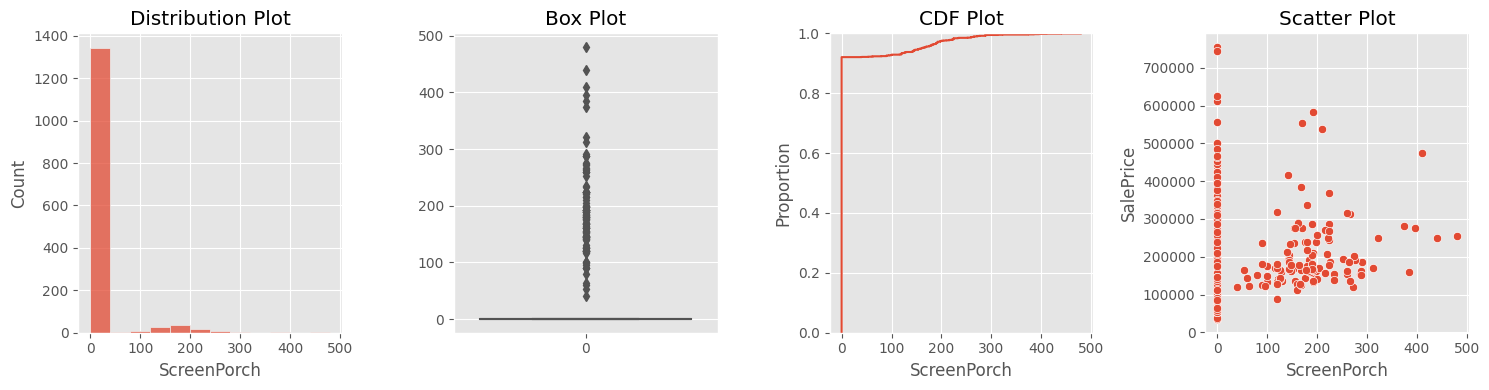

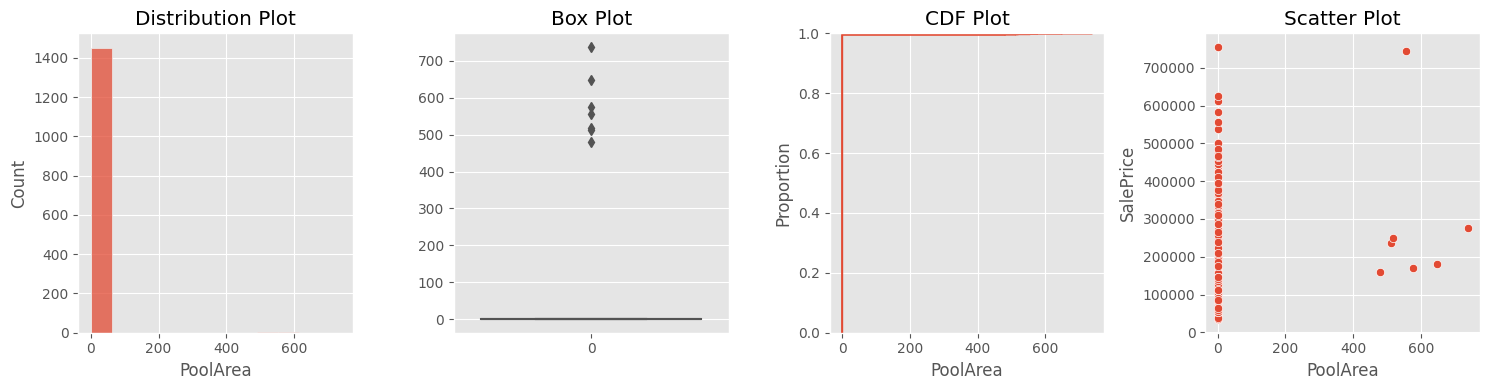

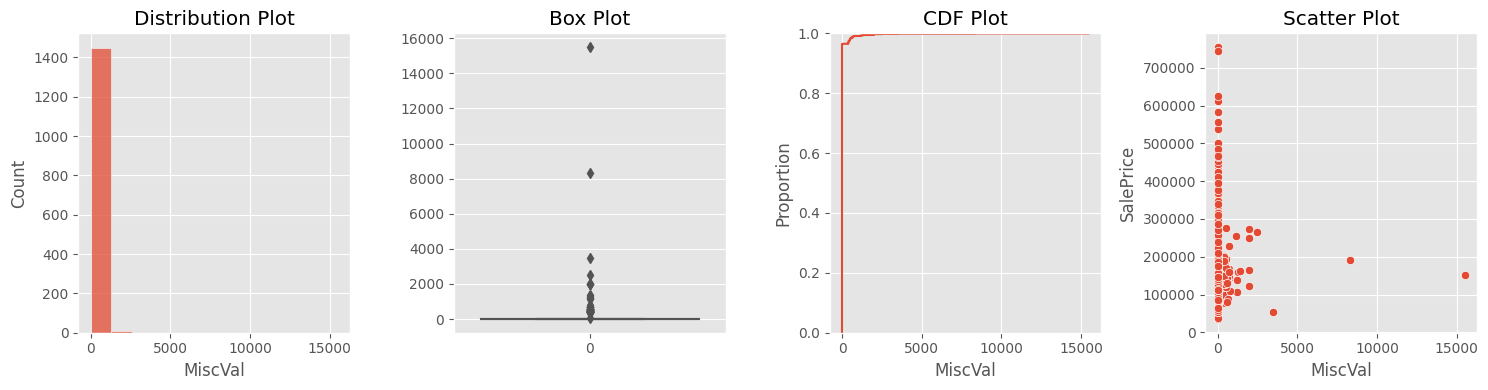

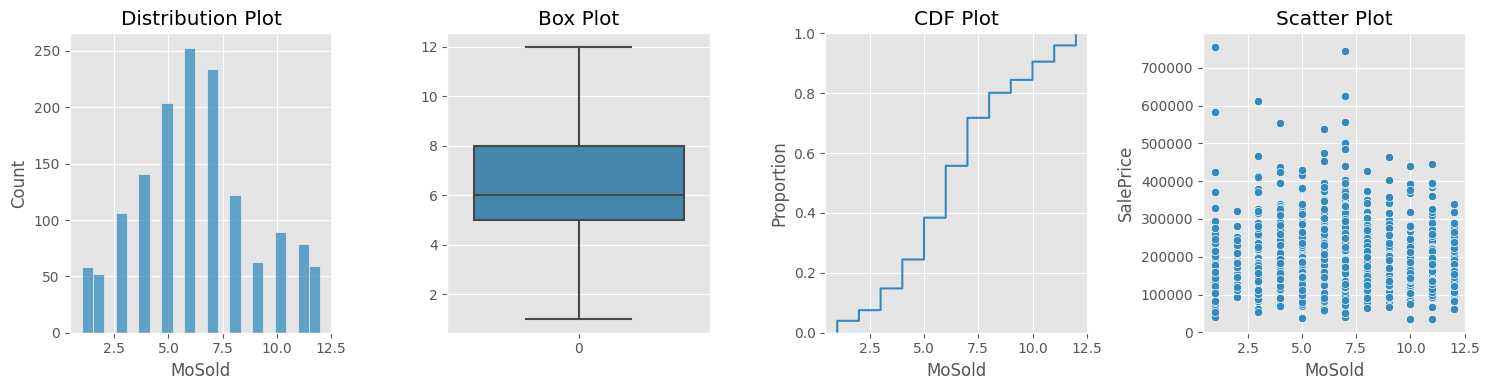

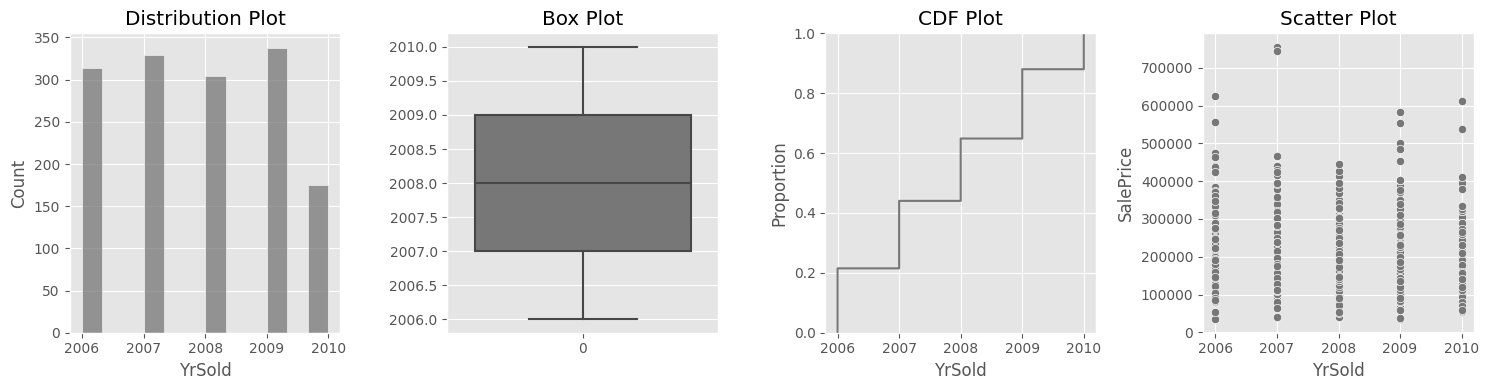

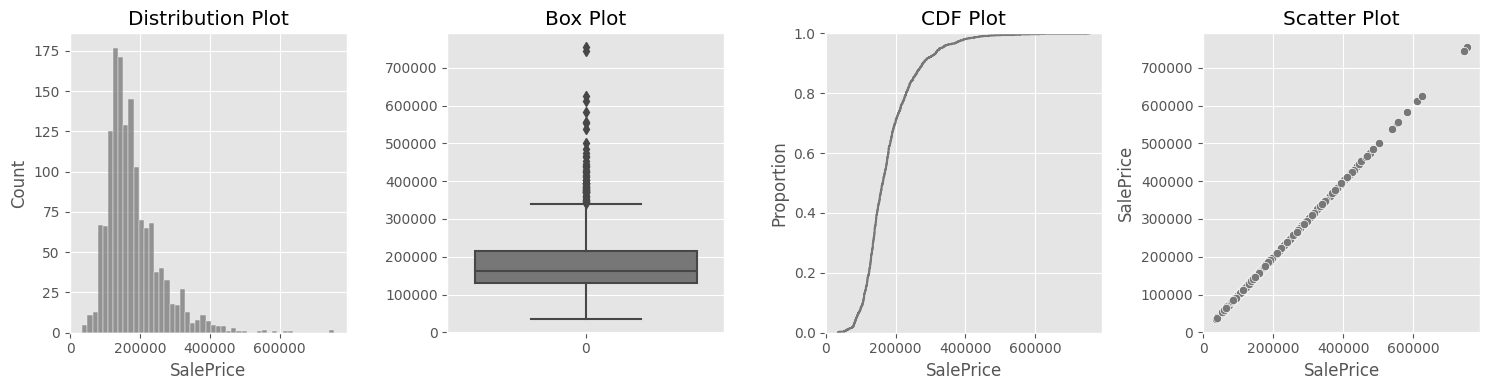

In [17]:
num_cols = df.select_dtypes(include=['float', 'int']).drop(columns='Id').columns.tolist()
for col in num_cols:
    plot_dist_box(df[col], df['SalePrice'])

- from above plots we can obsrve that some features having outliers
- we can handle when we are building regularization models

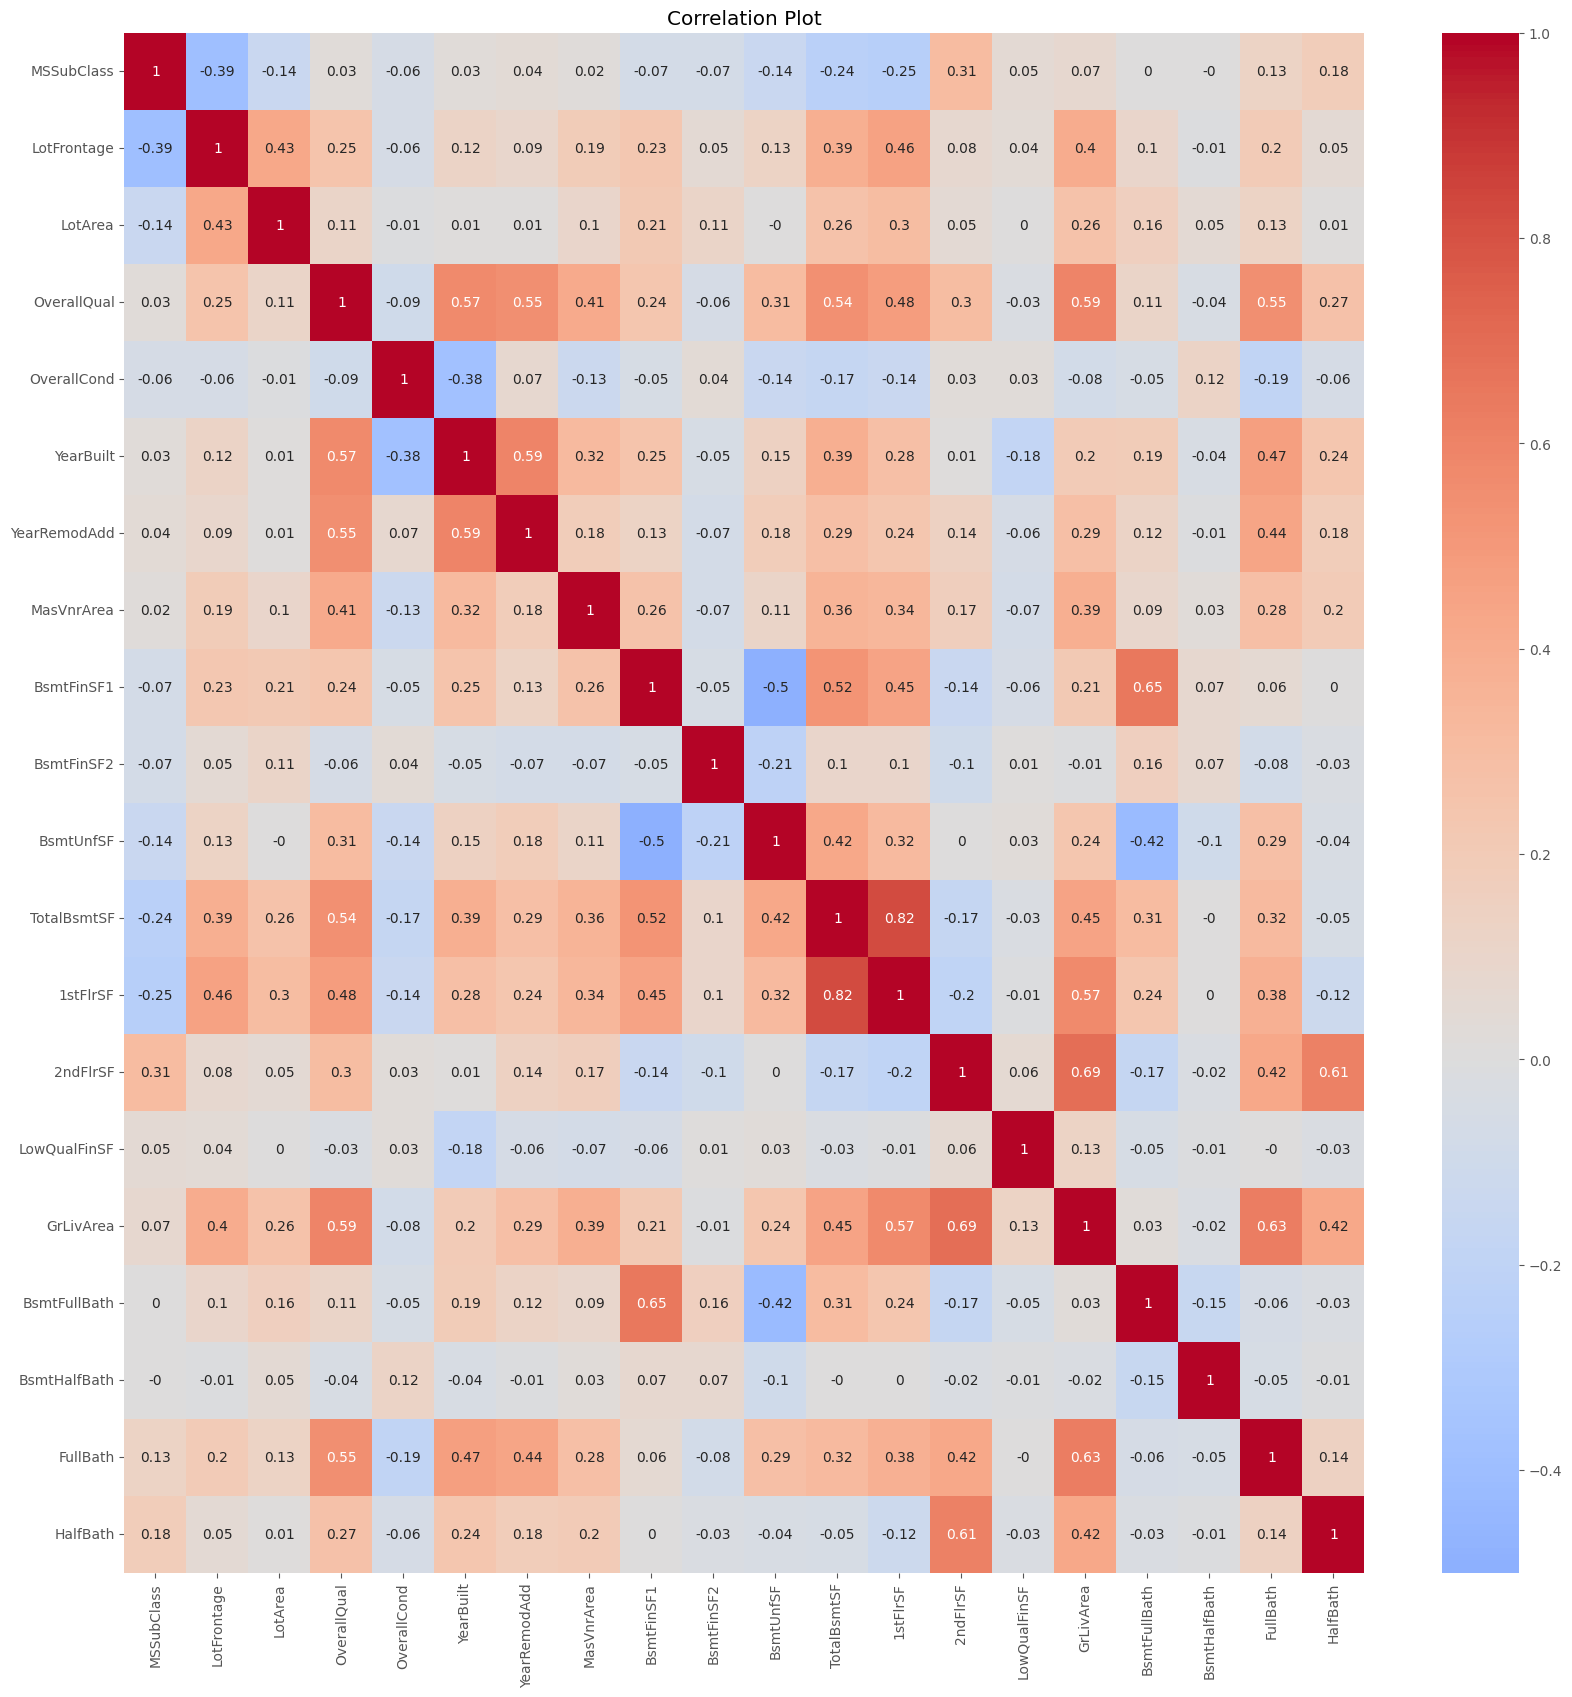

In [18]:
plt.figure(figsize=(20, 20))
sns.heatmap(df[num_cols[:20]].corr().round(2), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Plot')
plt.show()

- hear we can observe that some features having positive correlation and some are negitive correlation

In [19]:
df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

## Data Preparation

In [20]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [21]:
df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0     208500            0            0            1            0            1   
1     181500            0            0            1            0            1   
2     223500            0            0            1            0            1   
3     140000            0            0            1            0            1   
4     250000            0            0            1            0            1   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0           0             0             0             1                0   
1           0             0             0             1                0   
2           0             0             0             0                0   
3           0             0             0             0                0   
4           0             0             0             0                0   

   LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
0                0                1                 0                  0   
1                0                1                 0                  0   
2                0                1                 0

In [22]:
df.isna().sum().sort_values(ascending=False)

LotFrontage              259
GarageYrBlt               81
MasVnrArea                 8
BsmtQual_Fa                0
BsmtCond_TA                0
                        ... 
Condition1_RRNn            0
Condition2_Feedr           0
Condition2_Norm            0
Condition2_PosA            0
SaleCondition_Partial      0
Length: 247, dtype: int64

- we can obsrve that some features having null values
- we are filled with median value and filled with 0

In [23]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 247 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(209)
memory usage: 731.6 KB


## Train Test Split

- train 80%
- test 20%

In [25]:
train_df, test_df = model_selection.train_test_split(df, train_size=0.8)

train_df.shape, test_df.shape

((1168, 247), (292, 247))

## Feature Scalling

- converting numarical features into Robust scaling
- to eliminate outliers

In [29]:
scalling_features = [col for col in num_cols if col not in ['SalePrice', 'Id']]

min_max_scaler = preprocessing.RobustScaler()

train_df[scalling_features] = min_max_scaler.fit_transform(train_df[scalling_features])
test_df[scalling_features] = min_max_scaler.transform(test_df[scalling_features])

In [30]:
train_df.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000  1.168000e+03  1168.000000   
mean    718.887842     0.134503     0.057003  1.742563e-01     0.053082   
std     421.701160     0.842172     1.186483  1.538272e+00     0.703285   
min       1.000000    -0.600000    -2.526316 -1.965251e+00    -2.500000   
25%     354.500000    -0.600000    -0.473684 -4.576145e-01    -0.500000   
50%     717.500000     0.000000     0.000000 -1.949396e-16     0.000000   
75%    1082.250000     0.400000     0.526316  5.423855e-01     0.500000   
max    1460.000000     2.800000    12.842105  2.614877e+01     2.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea    BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1.168000e+03   
mean      0.575342    -0.035763     -0.238847     0.636276  9.253941e-02   
std       1.128948     0.631655      0.548132     1.119656  6.426401e-01   
min      -4.000000    -2.104167     -1.157895     0.000000 -5.282087e-01   
25%       0.000000    -0.416667     -0.736842     0.000000 -5.282087e-01   
50%       0.000000     0.000000      0.000000     0.000000  5.518589e-17   
75%       1.000000     0.583333      0.263158     1.000000  4.717913e-01   
max       4.000000     0.770833      0.421053     8.599064  7.432299e+00   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      0.031242     0.148996     0.144146     0.152534     0.477359   
std       0.108730     0.763444     0.887335     0.768535     0.594643   
min       0.000000    -0.846387    -2.003035    -1.493307     0.000000   
25%       0.000000    -0.437040    -0.380374    -0.395141     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.562960     0.619626     0.604859     1.000000   
max       1.000000     3.196884    10.359130     7.149232     2.794317   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       0.010885     0.080685      0.419521      0.027397    -0.432363   
std        0.089440     0.810821      0.509074      0.117542     0.551275   
min        0.000000    -1.732368      0.000000      0.000000    -2.000000   
25%        0.000000    -0.511247      0.000000      0.000000    -1.000000   
50%        0.000000     0.000000      0.000000      0.000000     0.000000   
75%        0.000000     0.488753      1.000000      0.000000     0.000000   
max        1.000000     6.362181      2.000000      1.000000     1.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.387842     -0.125000      0.014555      0.274401    -0.387842   
std       0.504740      0.807925      0.072215      0.817967     0.647523   
min       0.000000     -3.000000     -0.333333     -2.000000    -1.000000   
25%       0.000000     -1.000000      0.000000     -0.500000    -1.000000   
50%       0.000000      0.000000      0.000000      0.000000     0.000000   
75%       1.000000      0.000000      0.000000      0.500000     0.000000   
max       2.000000      5.000000      0.666667      4.000000     2.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     -0.034422    -0.221747    -0.009372     0.550468     0.304492   
std       0.620259     0.744916     0.889469     0.745968     0.948773   
min      -2.051282    -2.000000    -1.991701     0.000000    -0.367647   
25%      -0.461538    -1.000000    -0.597510     0.000000    -0.367647   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.538462     0.000000     0.402490     1.000000     0.632353   
max     

In [31]:
test_df.describe()

Id  MSSubClass  LotFrontage     LotArea  OverallQual  \
count   292.000000  292.000000   292.000000  292.000000   292.000000   
mean    776.948630    0.151712    -0.000721    0.655634     0.035959   
std     418.749883    0.862525     1.044415    4.569329     0.643157   
min      12.000000   -0.600000    -2.526316   -2.009027    -1.500000   
25%     419.000000   -0.600000    -0.473684   -0.475607    -0.500000   
50%     794.000000    0.000000     0.000000    0.043777     0.000000   
75%    1130.000000    0.425000     0.473684    0.518890     0.500000   
max    1459.000000    2.800000     5.947368   50.905089     2.000000   

       OverallCond   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
count   292.000000  292.000000    292.000000  292.000000  292.000000   
mean      0.575342   -0.037386     -0.246485    0.672280    0.117429   
std       1.047567    0.620492      0.524399    1.161363    0.646644   
min      -3.000000   -2.041667     -1.157895    0.000000   -0.528209   
25%       0.000000   -0.359375     -0.684211    0.000000   -0.528209   
50%       0.000000   -0.010417     -0.039474    0.000000    0.051481   
75%       1.000000    0.526042      0.236842    1.085803    0.480606   
max       4.000000    0.750000      0.421053    9.984399    2.659379   

       BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF  \
count  292.000000  292.000000   292.000000  292.000000  292.000000   
mean     0.032932    0.081131     0.105556    0.139757    0.438282   
std      0.112432    0.769149     0.889605    0.760331    0.574601   
min      0.000000   -0.846387    -2.003035   -1.417947    0.000000   
25%      0.000000   -0.538728    -0.457258   -0.442241    0.000000   
50%      0.000000   -0.115967     0.027314    0.003966    0.000000   
75%      0.000000    0.498486     0.631765    0.575112    0.938092   
max      0.721167    2.502813     4.345979    4.067427    2.081191   

       LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    292.000000  292.000000    292.000000    292.000000  292.000000   
mean       0.007550    0.023914      0.448630      0.034247   -0.445205   
std        0.064336    0.761900      0.556836      0.126512    0.550299   
min        0.000000   -1.302326      0.000000      0.000000   -2.000000   
25%        0.000000   -0.535265      0.000000      0.000000   -1.000000   
50%        0.000000   -0.059474      0.000000      0.000000    0.000000   
75%        0.000000    0.390011      1.000000      0.000000    0.000000   
max        0.734266    4.889058      3.000000      0.500000    1.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000    292.000000    292.000000  292.000000   
mean     0.363014     -0.167808      0.019406      0.196918   -0.383562   
std      0.495757      0.847023      0.078186      0.789596    0.634195   
min      0.000000     -3.000000      0.000000     -1.500000   -1.000000   
25%      0.000000     -1.000000      0.000000     -0.500000   -1.000000   
50%      0.000000      0.000000      0.000000      0.000000    0.000000   
75%      1.000000      0.000000      0.000000      0.500000    0.000000   
max      2.000000      3.000000      0.333333      3.000000    1.000000   

       GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
count   292.000000  292.000000  292.000000  292.000000   292.000000   
mean     -0.043203   -0.277397   -0.108154    0.603025     0.374698   
std       0.596081    0.756486    0.874898    0.746244     1.070494   
min      -1.897436   -2.000000   -1.991701    0.000000    -0.367647   
25%      -0.410256   -1.000000   -0.746888    0.000000    -0.367647   
50%       0.000000    0.000000   -0.066390    0.300595    -0.014706   
75%       0.512821    0.000000    0.323651    1.074405     0.694853   
max       0.743590    2.000000    2.443983    5.101190     5.602941   

       EnclosedPorch   3SsnPorch  ScreenPorch  PoolArea     MiscVal  \
count     292.000000  29

In [32]:
target_col = 'SalePrice'
drop_cols = [target_col, 'Id']
train_cols = [col for col in train_df.columns if col not in drop_cols]

X_train = train_df[train_cols]
y_train = train_df[target_col]

X_test = test_df[train_cols]
y_test = test_df[target_col]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1168, 245), (1168,), (292, 245), (292,))

## Model Building

### Linear Regression

In [33]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [35]:
def print_metrics(y_train, y_pred_train, y_test, y_pred_test):
    
    train_r2_score = metrics.r2_score(y_true=y_train, y_pred=y_pred_train)
    test_r2_score = metrics.r2_score(y_true=y_test, y_pred=y_pred_test)

    print("Train R2 score : ", np.round(train_r2_score, 2))
    print("Test R2 score : ", np.round(test_r2_score, 2))

    train_rmse_score = metrics.mean_squared_error(y_true=y_train, y_pred=y_pred_train, squared=True)
    test_rmse_score = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_test, squared=True)

    print("Train RMSE score : ", np.round(train_rmse_score, 2))
    print("Test RMSE score : ", np.round(test_rmse_score, 2))

    train_mse_score = metrics.mean_squared_error(y_true=y_train, y_pred=y_pred_train, squared=False)
    test_mse_score = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_test, squared=False)

    print("Train MSE score : ", np.round(train_mse_score, 2))
    print("Test MSE score : ", np.round(test_mse_score, 2))

    train_mae_score = metrics.mean_absolute_error(y_true=y_train, y_pred=y_pred_train)
    test_mae_score = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_test)

    print("Train MAE score : ", np.round(train_mae_score, 2))
    print("Test MAE score : ", np.round(test_mae_score, 2))

In [36]:
print_metrics(y_train, y_pred_train, y_test, y_pred_test)

Train R2 score :  0.94
Test R2 score :  -3.303616194971673e+18
Train RMSE score :  352559686.29
Test RMSE score :  1.961737879541753e+28
Train MSE score :  18776.57
Test MSE score :  140062053374272.4
Train MAE score :  12895.77
Test MAE score :  9251572812424.45


- hear we can obsrve that train and test scores are very diffrent
- that means model overfitting on training data
- to overcome this problem we are going to apply regulirzation to linear modle using Ridge and Lasso regressions

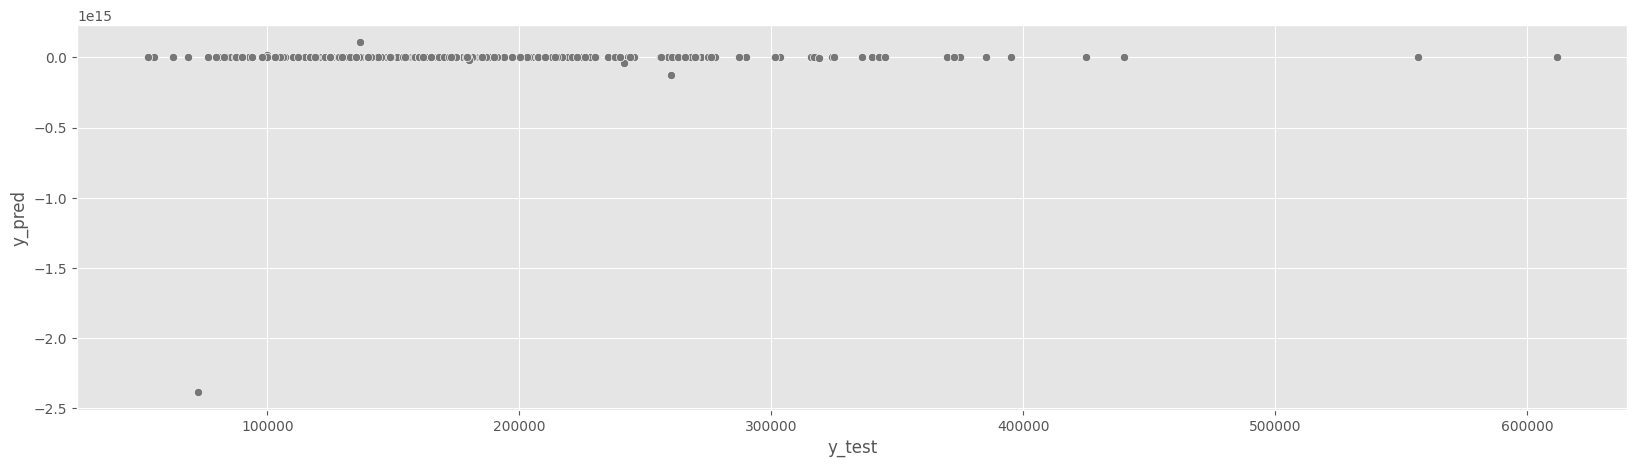

In [40]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x=y_test, y=y_pred_test, color=choice(color_pal))
plt.xlabel('y_test')            
plt.ylabel('y_pred')
plt.show()

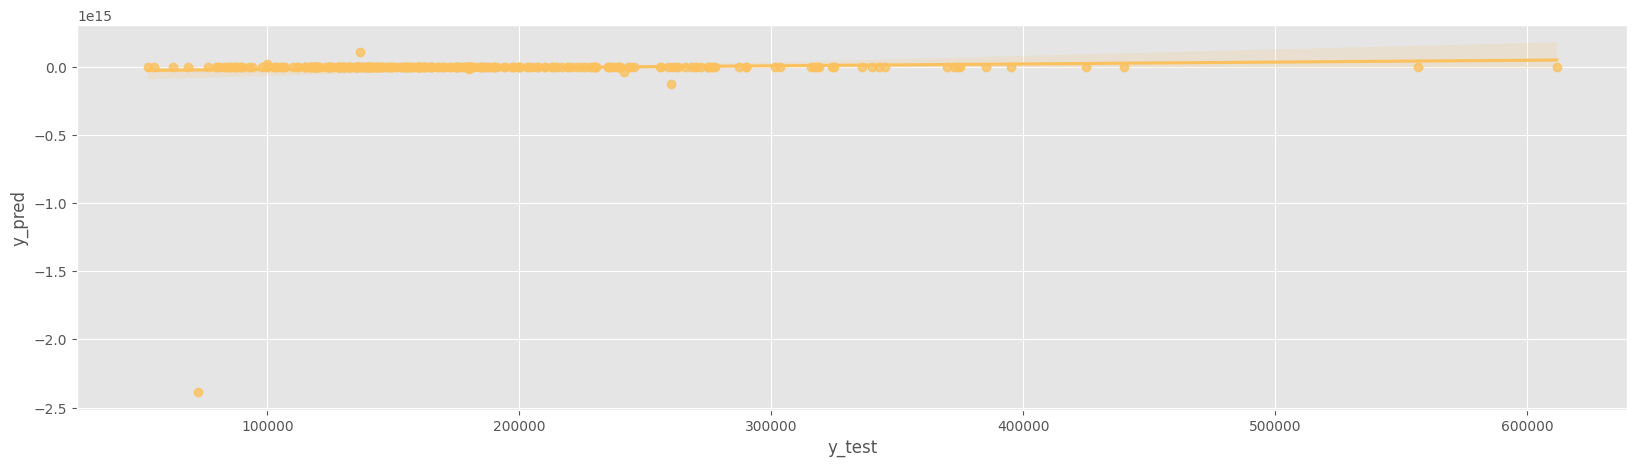

In [41]:
plt.figure(figsize=(20, 5))
sns.regplot(x=y_test, y=y_pred_test, color=choice(color_pal))
plt.xlabel('y_test')            
plt.ylabel('y_pred')
plt.show()

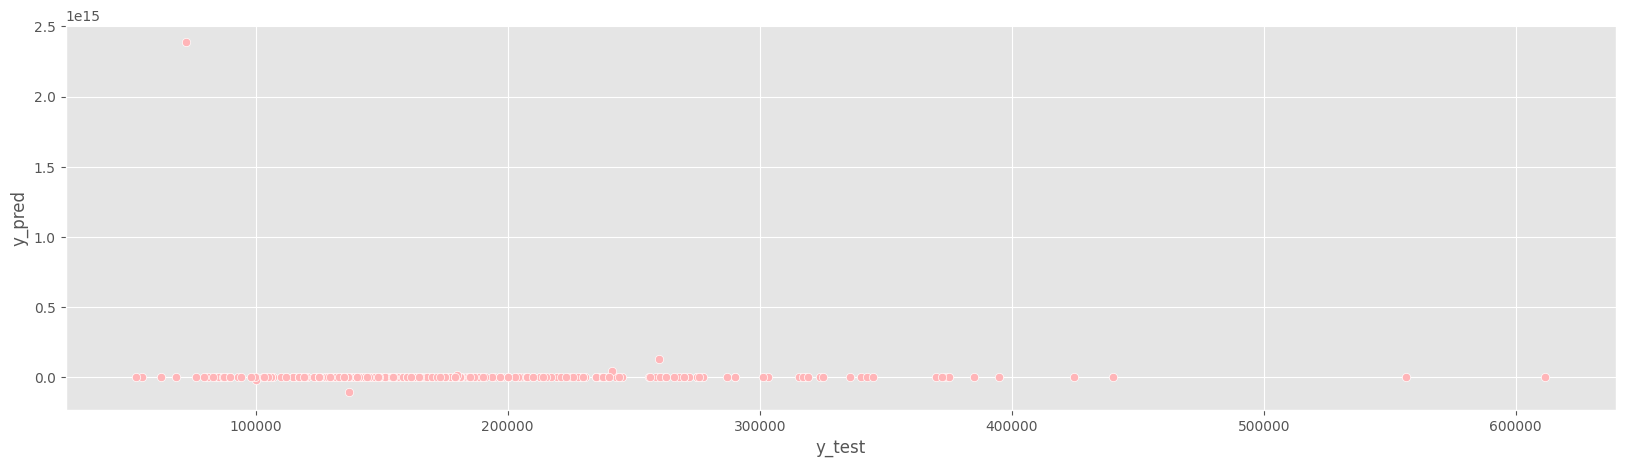

In [42]:
residual = y_test - y_pred_test

plt.figure(figsize=(20, 5))
sns.scatterplot(x=y_test, y=residual, color=choice(color_pal))
plt.xlabel('y_test')            
plt.ylabel('y_pred')
plt.show()

- we can obsrve that some outliear points more effecting out model

### Ridge Regression

In [44]:
rr = linear_model.Ridge()
rr.fit(X_train, y_train)

Ridge()

In [45]:
y_pred_train = rr.predict(X_train)
y_pred_test = rr.predict(X_test)

In [46]:
print_metrics(y_train, y_pred_train, y_test, y_pred_test)

Train R2 score :  0.92
Test R2 score :  0.79
Train RMSE score :  490181711.9
Test RMSE score :  1240829439.65
Train MSE score :  22140.05
Test MSE score :  35225.41
Train MAE score :  14526.56
Test MAE score :  19234.42


#### Ridge Regression GridSearchCV

In [47]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = linear_model.Ridge()

# cross validation
folds = 5
model_cv = model_selection.GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)        

model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [49]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 20
ridge = linear_model.Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-8.44527780e+03 -3.09085404e+03  2.08058658e+03  2.24171272e+04
  5.40718308e+03  9.14539861e+03  3.40764043e+03  4.83945827e+03
 -6.13612297e+02  2.38456491e+03 -8.86871170e+02  5.19455285e+03
  5.19364610e+03  1.79489166e+04 -4.71255260e+02  2.38102743e+04
  6.50215019e+03  2.15207286e+03  6.64006866e+03  2.94587263e+03
 -3.04520098e+03 -5.89087949e+03  2.37118579e+03  3.56119424e+03
  5.94695121e+02  1.28225076e+04 -1.44468001e+03  2.53783243e+03
  9.26252301e+02  2.54550864e+03  2.91193355e+03  1.12598427e+04
  1.88595452e+03 -1.45019751e+03 -1.64908188e+00 -1.73797244e+03
  5.38342358e+03 -1.19798233e+02  4.92660921e+03 -1.87127419e+03
  3.07576842e+03 -2.72725634e+03  5.44169025e+03 -1.38028106e+04
 -8.05689400e+02  1.01078396e+04 -2.68024085e+03  6.75754020e+03
 -1.90818959e+03  8.04527710e+03 -5.05541693e+03 -1.63500382e+03
 -1.31320064e+02  6.54974130e+03 -6.01252231e+03 -4.85078533e+02
  6.64504219e+02  3.30098313e+03 -3.77115516e+03 -4.43249819e+03
  1.07399537e+04 -1.03559

In [50]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [51]:
print_metrics(y_train, y_pred_train, y_test, y_pred_test)

Train R2 score :  0.9
Test R2 score :  0.81
Train RMSE score :  653523340.87
Test RMSE score :  1108896869.48
Train MSE score :  25564.1
Test MSE score :  33300.1
Train MAE score :  15270.69
Test MAE score :  17522.4


- using ridge regresson model we can obser that out train and test scores are close
- we reduced overfitting using regulization

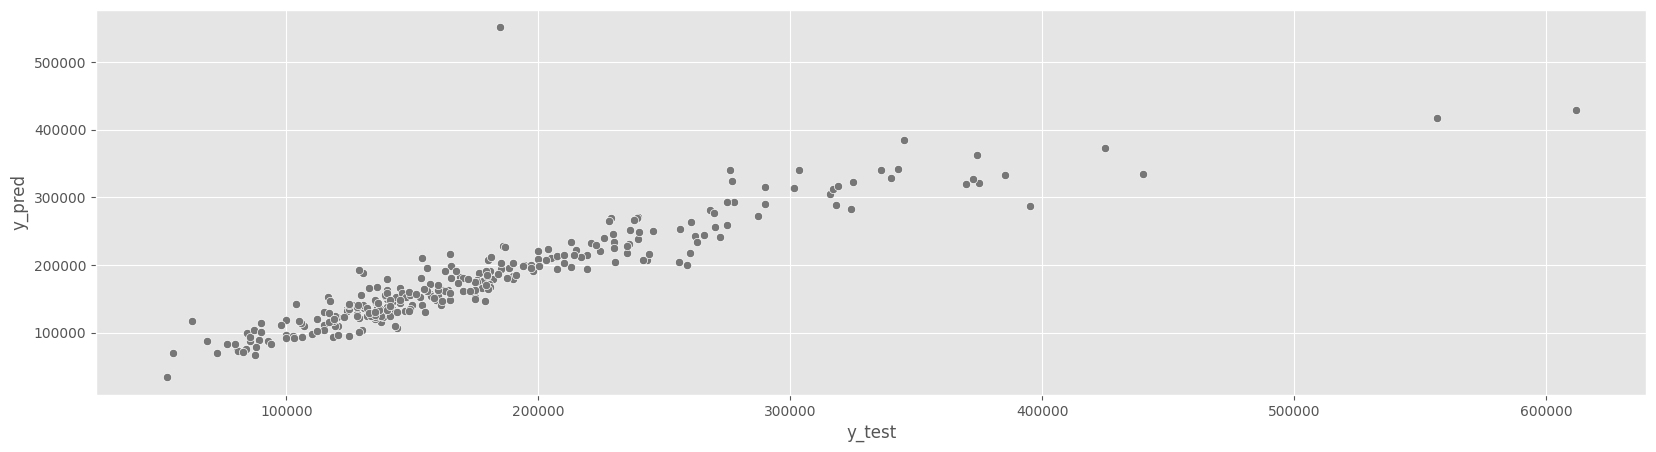

In [52]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x=y_test, y=y_pred_test, color=choice(color_pal))
plt.xlabel('y_test')            
plt.ylabel('y_pred')
plt.show()

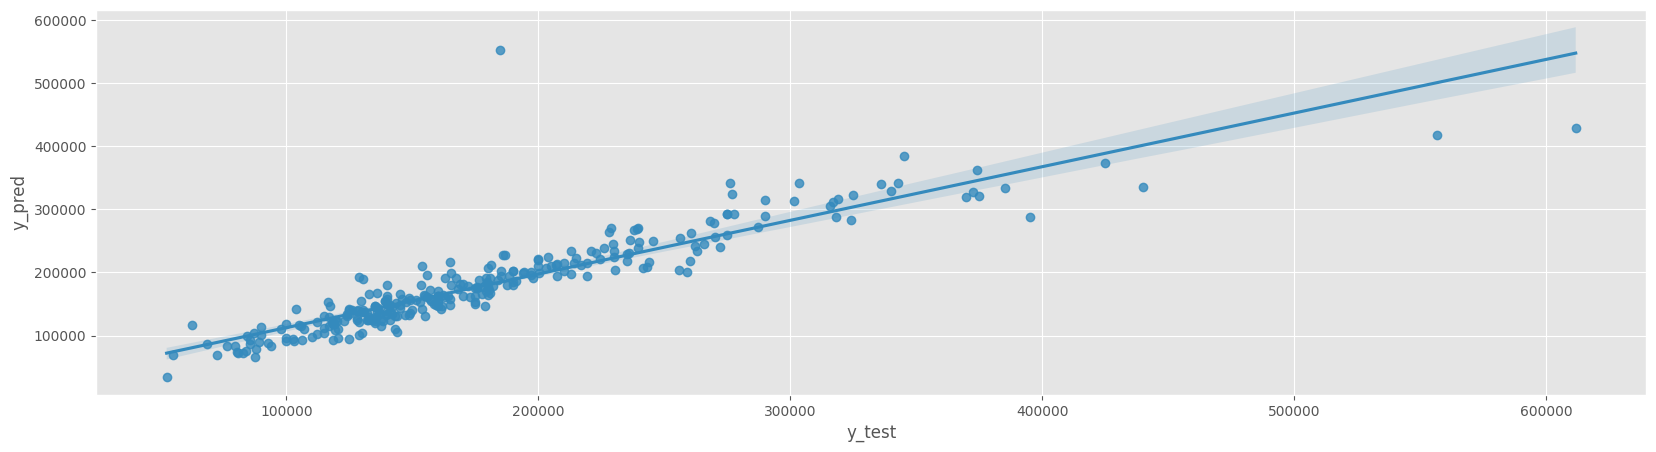

In [53]:
plt.figure(figsize=(20, 5))
sns.regplot(x=y_test, y=y_pred_test, color=choice(color_pal))
plt.xlabel('y_test')            
plt.ylabel('y_pred')
plt.show()

- we can observe that well fitted stright line hear

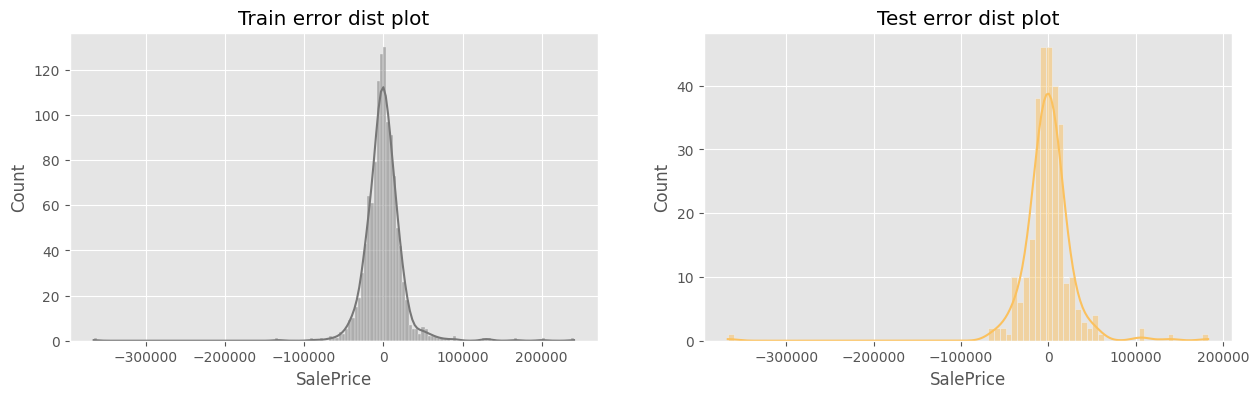

In [54]:
train_errors = (y_train - y_pred_train)
test_errors = (y_test - y_pred_test)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(train_errors, kde=True, color=choice(color_pal), ax=axes[0])
axes[0].set_title("Train error dist plot")

sns.histplot(test_errors, kde=True, color=choice(color_pal),  ax=axes[1])
axes[1].set_title("Test error dist plot")
plt.show()

- the error dist plots also following normal distribution

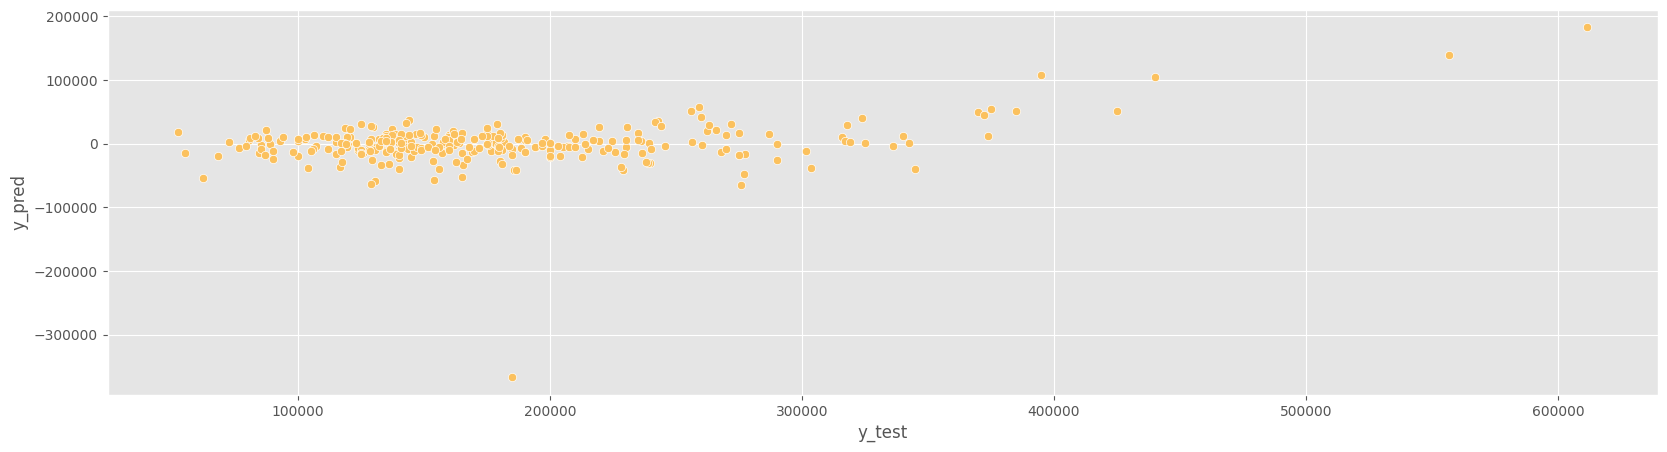

In [55]:
residual = y_test - y_pred_test

plt.figure(figsize=(20, 5))
sns.scatterplot(x=y_test, y=residual, color=choice(color_pal))
plt.xlabel('y_test')            
plt.ylabel('y_pred')
plt.show()

- we can see that there is no pattren in residual plot

Text(0, 0.5, 'cnt')

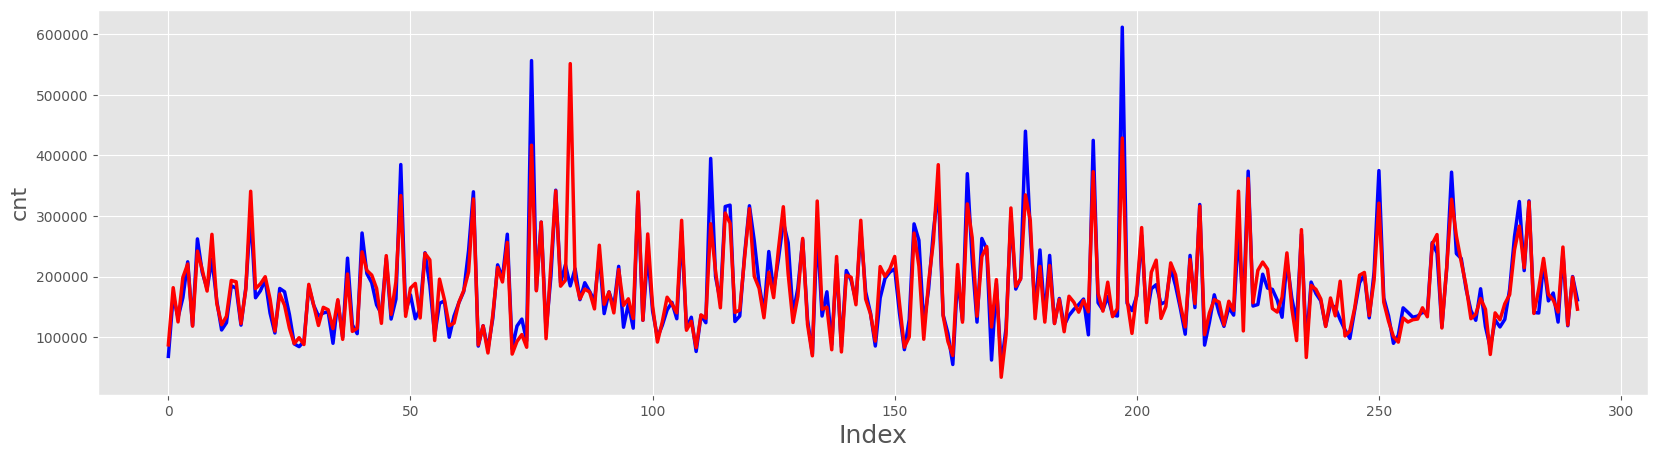

In [56]:
#Actual vs Predicted
c = [i for i in range(0,len(y_pred_test),1)]
plt.figure(figsize=(20, 5))
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred_test, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)                               # Y-label

#### Lasso Regression

#### Lasso Regression GridSearchCV

In [68]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = linear_model.Lasso()

# cross validation
folds = 5
model_cv = model_selection.GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)        

model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [70]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
lasso = linear_model.Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-8.89189599e+03 -2.46025397e+03  1.92093533e+03  2.03059801e+04
  5.73484755e+03  1.54596889e+04  3.01381548e+03  3.03318040e+03
  0.00000000e+00  0.00000000e+00 -6.76934411e+02  4.91700052e+03
  0.00000000e+00  1.12328332e+04 -0.00000000e+00  3.26586376e+04
  6.22417360e+03  0.00000000e+00  4.97717250e+03  5.09286524e+02
 -2.41751641e+03 -8.31344263e+02  3.61152491e+02  2.06808394e+03
  0.00000000e+00  1.14529700e+04 -1.39998167e+03  2.83886297e+03
  1.00004212e+03  0.00000000e+00  0.00000000e+00  1.66432418e+04
  1.11322835e+04 -0.00000000e+00 -0.00000000e+00 -1.56636553e+03
  5.92293840e+03 -0.00000000e+00  4.58320296e+03 -0.00000000e+00
  0.00000000e+00 -2.55492209e+02  3.26823424e+03 -2.76894675e+04
 -0.00000000e+00  1.29438731e+04 -0.00000000e+00  8.71767071e+03
 -0.00000000e+00  1.08526473e+04 -4.03918034e+03 -0.00000000e+00
  0.00000000e+00  4.83422554e+03 -4.08191422e+03 -0.00000000e+00
  0.00000000e+00  4.69815626e+03 -0.00000000e+00  0.00000000e+00
  1.96613500e+04 -6.78131

In [71]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [72]:
print_metrics(y_train, y_pred_train, y_test, y_pred_test)

Train R2 score :  0.91
Test R2 score :  0.81
Train RMSE score :  601624308.91
Test RMSE score :  1109479483.3
Train MSE score :  24528.03
Test MSE score :  33308.85
Train MAE score :  15316.71
Test MAE score :  17651.37


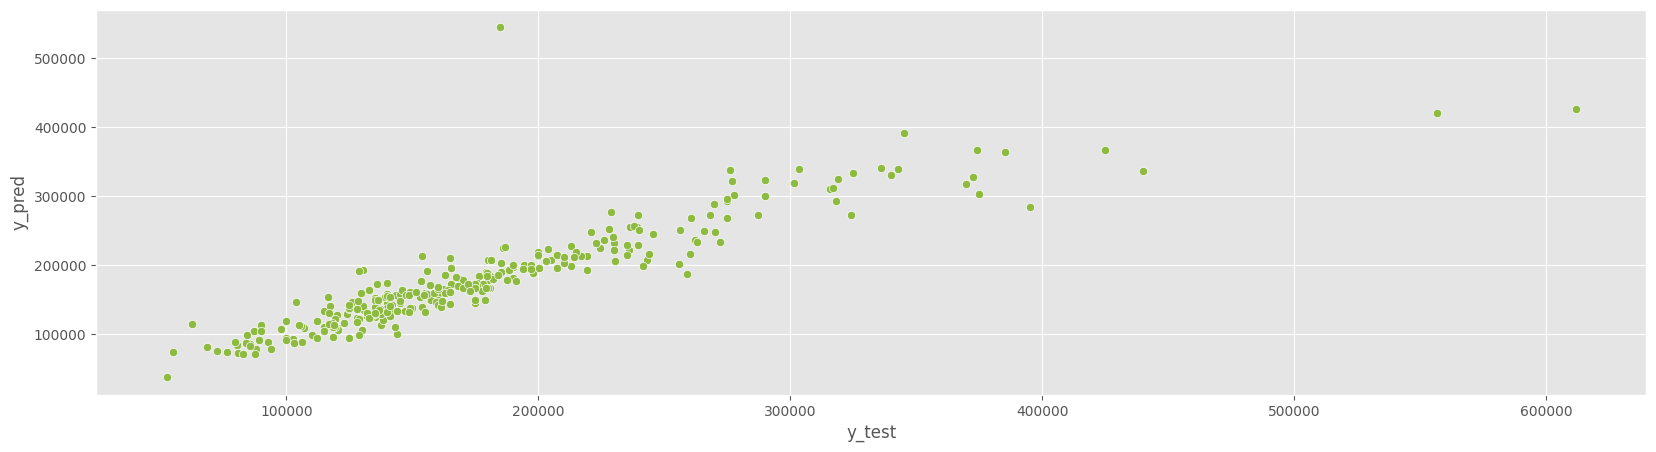

In [73]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x=y_test, y=y_pred_test, color=choice(color_pal))
plt.xlabel('y_test')            
plt.ylabel('y_pred')
plt.show()

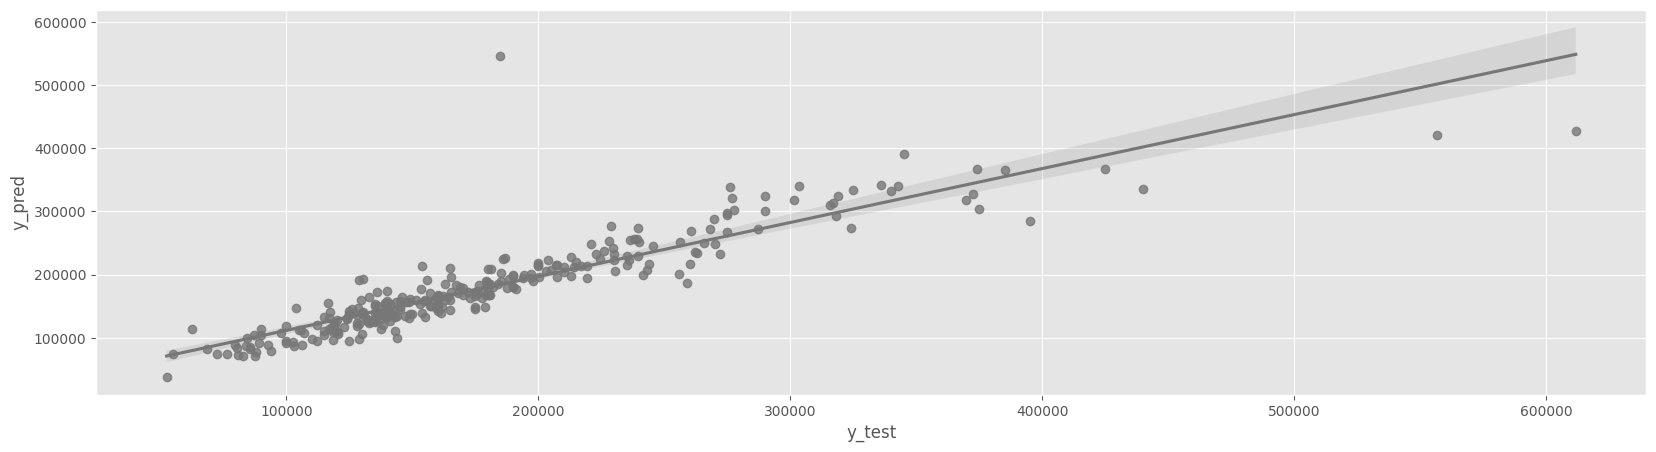

In [74]:
plt.figure(figsize=(20, 5))
sns.regplot(x=y_test, y=y_pred_test, color=choice(color_pal))
plt.xlabel('y_test')            
plt.ylabel('y_pred')
plt.show()

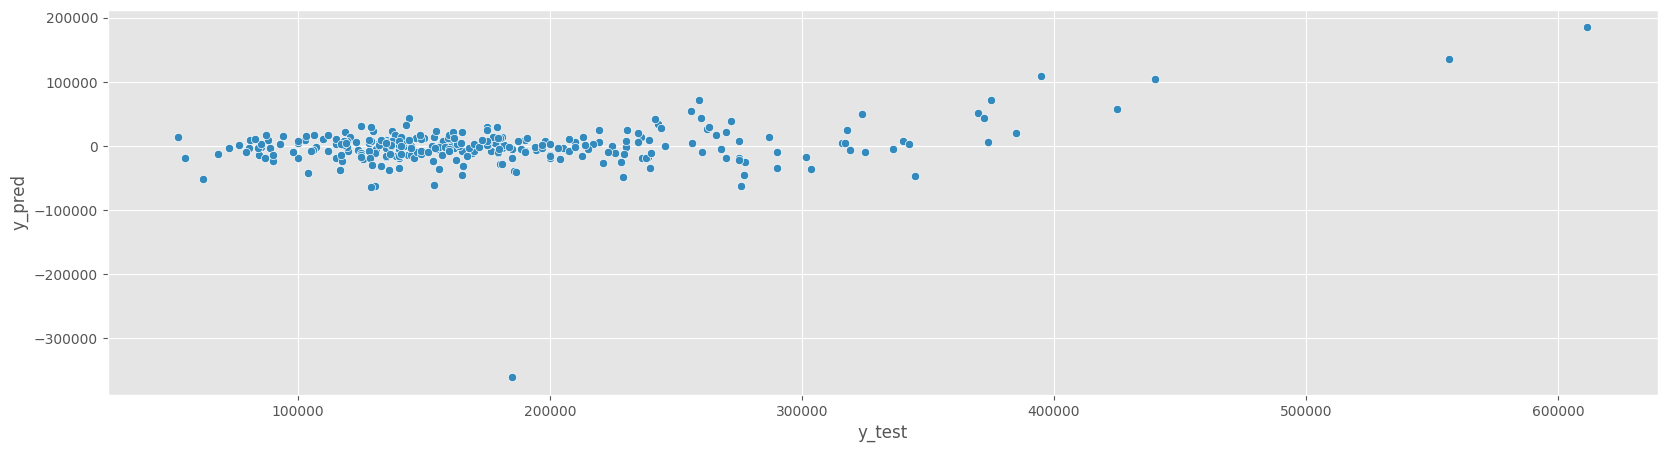

In [75]:
residual = y_test - y_pred_test

plt.figure(figsize=(20, 5))
sns.scatterplot(x=y_test, y=residual, color=choice(color_pal))
plt.xlabel('y_test')            
plt.ylabel('y_pred')
plt.show()

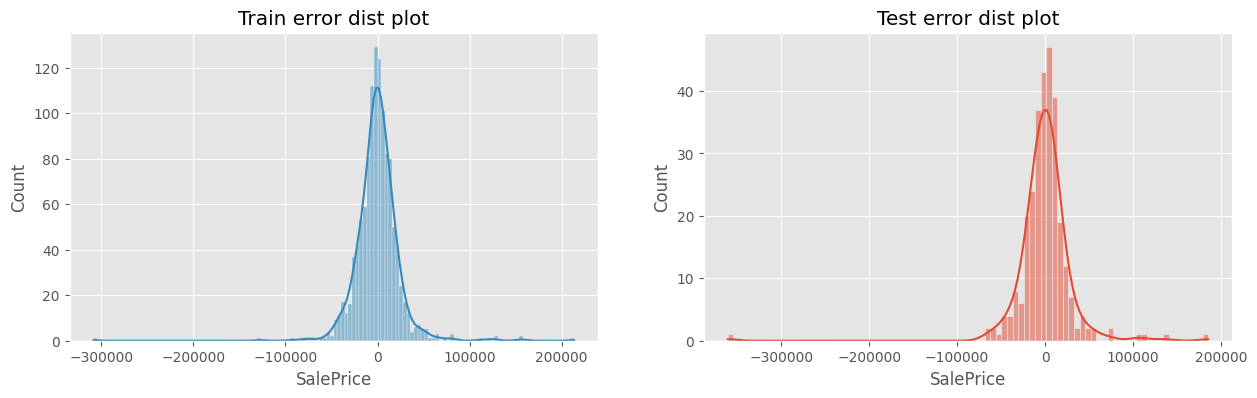

In [76]:
train_errors = (y_train - y_pred_train)
test_errors = (y_test - y_pred_test)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(train_errors, kde=True, color=choice(color_pal), ax=axes[0])
axes[0].set_title("Train error dist plot")

sns.histplot(test_errors, kde=True, color=choice(color_pal),  ax=axes[1])
axes[1].set_title("Test error dist plot")
plt.show()

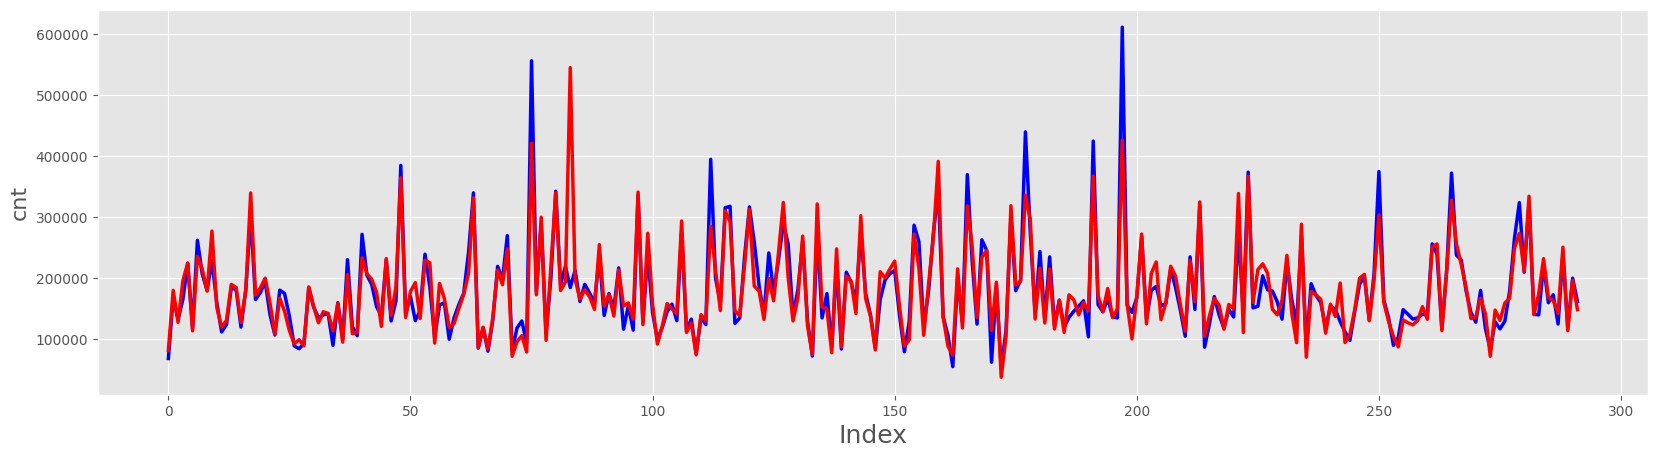

In [77]:
#Actual vs Predicted
c = [i for i in range(0,len(y_pred_test),1)]
plt.figure(figsize=(20, 5))
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred_test, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)    
plt.show()

- we can oberve that train and test r2 scores close
- so we reduced overfitting in trainin data
- we can also observe that some fitting stright line for y_pred vs y_actual
- we can see there is no pattrens we can observe in reducal plot
- both train and test errors following normal distributions

## Coefficients after regularization

In [78]:
coef_df = pd.DataFrame(index=X_train.columns)

In [79]:
coef_df.rows = X_train.columns

coef_df['Linear'] = lr.coef_
coef_df['Ridge'] = ridge.coef_
coef_df['Lasso'] = lasso.coef_

In [80]:
pd.set_option('display.max_rows', None)
coef_df

Linear         Ridge         Lasso
MSSubClass             1.934186e+03  -8445.277796  -8891.895988
LotFrontage            1.800273e+02  -3090.854042  -2460.253972
LotArea                4.538179e+03   2080.586579   1920.935327
OverallQual            1.190937e+04  22417.127222  20305.980076
OverallCond            5.799780e+03   5407.183077   5734.847552
YearBuilt              1.989515e+04   9145.398613  15459.688900
YearRemodAdd           3.873306e+03   3407.640427   3013.815478
MasVnrArea             2.885748e+03   4839.458267   3033.180395
BsmtFinSF1            -2.947286e+16   -613.612297      0.000000
BsmtFinSF2            -6.127361e+16   2384.564913      0.000000
BsmtUnfSF             -2.401684e+16   -886.871170   -676.934411
TotalBsmtSF            2.054578e+16   5194.552847   4917.000521
1stFlrSF               9.349486e+15   5193.646101      0.000000
2ndFlrSF               1.370207e+16  17948.916564  11232.833223
LowQualFinSF           1.060566e+16   -471.255260     -0.000000
GrLivArea             -1.215850e+16  23810.274310  32658.637623
BsmtFullBath           2.134004e+03   6502.150189   6224.173601
BsmtHalfBath           2.040959e+03   2152.072863      0.000000
FullBath               2.450471e+03   6640.068661   4977.172499
HalfBath               4.075476e+02   2945.872633    509.286524
BedroomAbvGr          -4.000117e+03  -3045.200976  -2417.516412
KitchenAbvGr          -3.401115e+04  -5890.879487   -831.344263
TotRmsAbvGrd           1.093151e+03   2371.185786    361.152491
Fireplaces             2.366699e+03   3561.194239   2068.083942
GarageYrBlt            9.593046e+02    594.695121      0.000000
GarageCars             5.412092e+03  12822.507562  11452.970015
GarageArea             2.344376e+02  -1444.680013  -1399.981665
WoodDeckSF             1.797905e+03   2537.832426   2838.862965
OpenPorchSF            9.597219e+02    926.252301   1000.042122
EnclosedPorch         -1.473444e+03   2545.508642      0.000000
3SsnPorch              1.912488e+04   2911.933550      0.000000
ScreenPorch            2.227026e+04  11259.842736  16643.241796
PoolArea               1.255553e+05   1885.954523  11132.283478
MiscVal               -2.392872e+04  -1450.197506     -0.000000
MoSold                -7.000000e+02     -1.649082     -0.000000
YrSold                -1.931000e+03  -1737.972441  -1566.365526
MSZoning_FV            3.761700e+04   5383.423579   5922.938400
MSZoning_RH            2.688877e+04   -119.798233     -0.000000
MSZoning_RL            2.768900e+04   4926.609213   4583.202957
MSZoning_RM            2.519400e+04  -1871.274189     -0.000000
Street_Pave            3.353150e+04   3075.768421      0.000000
Alley_Pave            -2.012875e+03  -2727.256337   -255.492209
LotShape_IR2           8.970000e+02   5441.690251   3268.234239
LotShape_IR3          -7.443844e+03 -13802.810569 -27689.467471
LotShape_Reg           6.620000e+02   -805.689400     -0.000000
LandContour_HLS        4.715250e+03  10107.839644  12943.873055
LandContour_Low       -2.009275e+04  -2680.240852     -0.000000
LandContour_Lvl       -6.127500e+02   6757.540200   8717.670709
Utilities_NoSeWa      -2.487900e+04  -1908.189587     -0.000000
LotConfig_CulDSac      1.054050e+04   8045.277104  10852.647325
LotConfig_FR2         -7.738500e+03  -5055.416932  -4039.180341
LotConfig_FR3         -1.912241e+04  -1635.003822     -0.000000
LotConfig_Inside       3.875000e+02   -131.320064      0.000000
LandSlope_Mod          7.701000e+03   6549.741299   4834.225544
LandSlope_Sev         -3.864850e+04  -6012.522305  -4081.914218
Neighborhood_Blueste  -1.045606e+04   -485.078533     -0.000000
Neighborhood_BrDale   -2.180250e+03    664.504219      0.000000
Neighborhood_BrkSide  -5.835000e+03   3300.983129   4698.156256
Neighborhood_ClearCr  -2.481623e+04  -3771.155164     -0.000000
Neighborhood_CollgCr  -1.249700e+04  -4432.498191      0.000000
Neighborhood_Crawfor   8.958000e+03  10739.953685  19661.350042
Neighborhood_Edwards  -2.250225e+04 -10355.952469  -6781.3186

- we can see that for Lasso model some feature coefficents are become zero that means those features are not much usefull to predict target value

## Results

### Linear Regression
    - Train R2 score :  0.94
    - Test R2 score :  -3.303616194971673e+18
    
### Ridge Regression
    - Train R2 score :  0.90
    - Test R2 score :  0.81
    
### Lasso Regression
    - Train R2 score :  0.91
    - Test R2 score :  0.81

- we can obsrve that Linear model without regularization overfing in training data
- to overcome that we applied regualization models like Ridge and Lasso
- we can see that train and test r2 scores are close enought
- so we reduced overfitting in trainin data
- we can also observe that some fitting stright line for y_pred vs y_actual
- we can see there is no pattrens we can observe in reducal plot
- both train and test errors following normal distributions

In [90]:
imp_features = coef_df['Lasso'].abs().sort_values(ascending=False).index[:5].tolist()

In [91]:
target_col = 'SalePrice'
drop_cols = [target_col, 'Id'] + imp_features
train_cols = [col for col in train_df.columns if col not in drop_cols]

X_train = train_df[train_cols]
y_train = train_df[target_col]

X_test = test_df[train_cols]
y_test = test_df[target_col]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1168, 240), (1168,), (292, 240), (292,))

In [92]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
lasso = linear_model.Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-8.89014599e+03 -3.08399010e+03  2.43511959e+03  2.29541950e+04
  4.99325649e+03  1.27948859e+04  2.59826432e+03  4.93228935e+03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.77051861e+03
  2.53660176e+04  5.22326038e+04  2.65335703e+03  7.39695300e+03
  0.00000000e+00  4.34662290e+03  8.94342724e+02 -2.37288015e+03
 -3.68869891e+03  1.02410991e+02  1.35005270e+03  1.07037902e+03
  1.38414201e+04 -2.36829541e+03  2.62908783e+03  1.86385098e+02
  0.00000000e+00  0.00000000e+00  1.89232887e+04  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -1.78652414e+03  6.78076747e+03
 -0.00000000e+00  6.68637436e+03 -0.00000000e+00  0.00000000e+00
 -7.49638109e+02  4.19286353e+03 -4.08367841e+04 -6.82883004e+02
  1.50698845e+04 -0.00000000e+00  8.47666115e+03 -0.00000000e+00
  1.03473739e+04 -2.99405117e+03 -0.00000000e+00  0.00000000e+00
  4.92861504e+03 -1.26591339e+04 -0.00000000e+00  0.00000000e+00
  1.08883505e+03 -4.25648972e+03 -8.53024865e+03  1.29917112e+04
 -1.28826816e+04 -1.23985

In [93]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [94]:
print_metrics(y_train, y_pred_train, y_test, y_pred_test)

Train R2 score :  0.89
Test R2 score :  0.8
Train RMSE score :  679326377.28
Test RMSE score :  1208829049.45
Train MSE score :  26063.89
Test MSE score :  34768.22
Train MAE score :  15991.77
Test MAE score :  18533.27


In [95]:
coef_df = pd.DataFrame(index=X_train.columns)

In [96]:
coef_df.rows = X_train.columns

In [97]:
coef_df['Lasso'] = lasso.coef_

In [98]:
imp_features = coef_df['Lasso'].abs().sort_values(ascending=False).index[:5].tolist()

In [99]:
imp_features

['2ndFlrSF', 'LotShape_IR3', 'KitchenQual_Gd', 'KitchenQual_TA', '1stFlrSF']